In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import stats
from matplotlib.patches import Rectangle
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from statistics import mean, median


In [ ]:
# We used 10 logistic regression models to make predictions of the user-experience of data analytics and simulation. 
# For both data analytics and simulation, we predicted: 
# 1) Current use from demographic data 
# 2) Frequency of use from demographic data 
# 3) Usefulness in decision-making process from current use
# 4) Barriers faced from current use 
# 5) Improvement criteria from barriers faced. 
# For each model, we got significant results (p < 0.05), which gets outputted in a table. 
# Sig results are also printed out within the code. 

In [2]:
# import survey data 

data = pd.read_csv('DataSim.csv')
data["Q3"] = data["Q3"].map(str.strip)

In [3]:
Q2_bin = pd.get_dummies(data["Q2"])
Q3_bin = pd.get_dummies(data["Q3"])
Q4_bin = pd.get_dummies(data["Q4"])
Q5_bin = pd.get_dummies(data["Q5"])


In [4]:
dems = pd.concat([Q2_bin, Q3_bin, Q4_bin, Q5_bin, data.loc[:,"Q6.1":"Q6.14"]], axis=1)

In [5]:
list(dems.columns.values)

['Private',
 'Public',
 'Director',
 'Engineer',
 'Manager',
 'President',
 'Principal',
 '1 to 5',
 '10 to 20',
 '20+',
 '5 to 10',
 'Midwest',
 'Northeast',
 'South',
 'West',
 'Q6.1',
 'Q6.2',
 'Q6.3',
 'Q6.4',
 'Q6.5',
 'Q6.6',
 'Q6.7',
 'Q6.8',
 'Q6.9',
 'Q6.10',
 'Q6.11',
 'Q6.12',
 'Q6.13',
 'Q6.14']

In [6]:
dems

,Private,Public,Director,Engineer,Manager,President,Principal,1 to 5,10 to 20,20+,...,Q6.5,Q6.6,Q6.7,Q6.8,Q6.9,Q6.10,Q6.11,Q6.12,Q6.13,Q6.14
0,0,1,0,0,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
1,1,0,0,0,0,0,1,0,0,1,...,0,1,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,1,0,1,0,...,1,1,1,1,1,1,1,0,0,1
3,0,1,1,0,0,0,0,0,1,0,...,1,1,1,1,0,0,0,1,1,1
4,1,0,0,0,0,1,0,0,1,0,...,1,1,1,0,0,0,1,0,0,0
5,1,0,1,0,0,0,0,0,1,0,...,1,1,0,0,0,0,0,0,0,0
6,0,1,0,0,1,0,0,0,1,0,...,1,1,0,0,1,1,0,0,0,0
7,1,0,0,1,0,0,0,0,0,0,...,1,1,1,0,0,1,1,0,0,0
8,1,0,0,1,0,0,0,0,0,0,...,1,1,0,0,1,1,1,0,0,0
9,0,1,0,0,1,0,0,0,0,0,...,1,0,1,1,1,0,0,0,0,0


In [7]:
def draw_bs_pairs_log(x, y, size = 100):
    
    inds = np.arange(len(x))
    bs_slope_reps = []
    bs_intercept_reps = []
    
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        lr = LogisticRegression()
        lr.fit(bs_x, bs_y)
        bs_slope_reps.append(lr.coef_)
        bs_intercept_reps.append(lr.intercept_)
    
    return bs_slope_reps, bs_intercept_reps


# Effect of demographics on DA frequency of use 


In [8]:
x = dems.values.reshape(-1,29)
y = data["Q10"].values.reshape(-1,1)
a, b = draw_bs_pairs_log(x, y, size=100)

/Users/Charu/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [9]:
list0 = []
list1 = []
list2 = []
list3 = []
list4 = []
list5 = []

for i in range(100):
    for j in range(29):
        list0.append(a[i][0,j])
        list1.append(a[i][1,j])
        list2.append(a[i][2,j])
        list3.append(a[i][3,j])
        list4.append(a[i][4,j])
        list5.append(a[i][5,j])
        

In [10]:
array_0 = np.reshape(list0,(100,29))
array_1 = np.reshape(list1,(100,29))
array_2 = np.reshape(list2,(100,29))
array_3 = np.reshape(list3,(100,29))
array_4 = np.reshape(list4,(100,29))
array_5 = np.reshape(list5,(100,29))



In [11]:
mean_list = []

for i in range(29):
   mean_list.append(((array_0[:,i]>0).mean(), (array_0[:,i]<0).mean(), array_0[:,i].mean()))
    
dfcoef = pd.DataFrame(mean_list)

dfcoef.columns = ["Positive_0", "Negative_0", "Mean_0"]
dfcoef
dfcoef.to_csv('LogRegTables/1a_dems_to_freq_DA_0.csv')    
      

In [12]:
sig_means = []
                    
for i in range(29):
    if dfcoef["Positive_0"].loc[i] < 0.05 or dfcoef["Positive_0"].loc[i] > 0.95:
        sig_means.append(((i, dfcoef["Positive_0"].loc[i], dfcoef["Mean_0"].loc[i])))
    
sig_means  

[(0, 0.0, -0.7736720051364635),
 (1, 0.0, -0.744978327079008),
 (4, 0.03, -0.662773121850518),
 (6, 0.0, -0.13428562002493083),
 (9, 0.0, -0.8564926705728262),
 (14, 0.0, -0.7320418984084298),
 (22, 0.96, 0.8008816305209671),
 (24, 0.0, -0.8063735518026207),
 (26, 0.0, -0.3794970964532631)]

In [13]:
mean_list1 = []

for i in range(29):
   mean_list1.append(((array_1[:,i]>0).mean(), (array_1[:,i]<0).mean(), array_1[:,i].mean()))
    
dfcoef1 = pd.DataFrame(mean_list1)

dfcoef1.columns = ["Positive_1", "Negative_1", "Mean_1"]
dfcoef1
dfcoef1.to_csv('LogRegTables/1a_dems_to_freq_DA_1.csv')   

sig_means = []
                    
for i in range(29):
    if dfcoef1["Positive_1"].loc[i] < 0.05 or dfcoef1["Positive_1"].loc[i] > 0.95: 
        sig_means.append(((i, dfcoef1["Positive_1"].loc[i], dfcoef1["Mean_1"].loc[i])))
    
sig_means      

[(0, 0.01, -0.36114262651703244),
 (1, 0.01, -0.4369579786346188),
 (4, 0.99, 0.5074812590573008),
 (5, 0.0, -1.120832388432022),
 (6, 0.0, -0.4226767490818329),
 (9, 0.01, -0.501667901502798),
 (12, 0.03, -0.38409527712746727),
 (22, 0.99, 0.5590681367336988)]

In [14]:
mean_list2 = []

for i in range(29):
   mean_list2.append(((array_2[:,i]>0).mean(), (array_2[:,i]<0).mean(), array_2[:,i].mean()))
    
dfcoef2 = pd.DataFrame(mean_list2)

dfcoef2.columns = ["Positive_2", "Negative_2", "Mean_2"]
dfcoef2
dfcoef2.to_csv('LogRegTables/1a_dems_to_freq_DA_2.csv')     
    
sig_means = []
                    
for i in range(29):
    if dfcoef2["Positive_2"].loc[i] < 0.05 or dfcoef2["Positive_2"].loc[i] > 0.95: 
        sig_means.append(((i, dfcoef2["Positive_2"].loc[i], dfcoef2["Mean_2"].loc[i])))
    
sig_means      

[(1, 0.02, -0.3265245624769068), (21, 0.03, -0.37152137227898924)]

In [15]:
mean_list3 = []

for i in range(29):
   mean_list3.append(((array_3[:,i]>0).mean(), (array_3[:,i]<0).mean(), array_3[:,i].mean()))
    
dfcoef3 = pd.DataFrame(mean_list3)

dfcoef3.columns = ["Positive_3", "Negative_3", "Mean_3"]
dfcoef3
dfcoef3.to_csv('LogRegTables/1a_dems_to_freq_DA_3.csv')   
    
sig_means = []
                    
for i in range(29):
    if dfcoef3["Positive_3"].loc[i] < 0.05 or dfcoef3["Positive_3"].loc[i] > 0.95: 
        sig_means.append(((i, dfcoef3["Positive_3"].loc[i], dfcoef3["Mean_3"].loc[i])))

sig_means      

[(0, 0.04, -0.24792155888472386),
 (13, 0.03, -0.3055947642033581),
 (17, 0.02, -0.49203615860716055),
 (21, 0.99, 0.48727166661951704),
 (24, 0.97, 0.46871827578454345),
 (25, 0.03, -0.5632788731212589)]

In [16]:
mean_list4 = []

for i in range(29):
   mean_list4.append(((array_4[:,i]>0).mean(), (array_4[:,i]<0).mean(), array_4[:,i].mean()))
    
dfcoef4 = pd.DataFrame(mean_list4)

dfcoef4.columns = ["Positive_4", "Negative_4", "Mean_4"]
dfcoef4.to_csv('LogRegTables/1a_dems_to_freq_DA_4.csv')  
    
sig_means = []
                    
for i in range(29):
    if dfcoef4["Positive_4"].loc[i] < 0.05 or dfcoef4["Positive_4"].loc[i] > 0.95: 
        sig_means.append(((i, dfcoef4["Positive_4"].loc[i], dfcoef4["Mean_4"].loc[i])))

sig_means   

[(8, 0.01, -0.6038585840101198),
 (15, 0.04, -0.4428956074496185),
 (22, 0.03, -0.6488186947580268)]

In [17]:
mean_list5 = []

for i in range(29):
   mean_list5.append(((array_5[:,i]>0).mean(), (array_5[:,i]<0).mean(), array_5[:,i].mean()))
    
dfcoef5 = pd.DataFrame(mean_list5)

dfcoef5.columns = ["Positive_5", "Negative_5", "Mean_5"]
dfcoef5.to_csv('LogRegTables/1a_dems_to_freq_DA_5.csv')  
    
sig_means = []
                    
for i in range(29):
    if dfcoef5["Positive_5"].loc[i] < 0.05 or dfcoef5["Positive_5"].loc[i] > 0.95:  
        sig_means.append(((i, dfcoef5["Positive_5"].loc[i], dfcoef5["Mean_5"].loc[i])))

sig_means  

[(0, 0.01, -0.647378801153088),
 (1, 0.01, -0.607402007663809),
 (2, 0.0, -0.9986466789823139),
 (6, 0.0, -0.08471196470840811),
 (9, 0.02, -0.7590210427014185),
 (13, 0.04, -0.5818569575223292),
 (19, 0.96, 0.42714777883071336),
 (26, 0.0, -0.48408591891370706),
 (27, 0.0, -0.8234850956719535),
 (28, 0.0, -0.6646368253737756)]

In [18]:
for i in range(29):
    mean_list.append((array_0[:,i]>0).mean())
      

In [19]:
# d = {'Mean': [], 'Min': [], 'Max': []}
# dfcoef = pd.DataFrame(data = d)

mean_list = []
for i in range(29):
    
    mean_list.append((max(array_0[:,i]), array_0[:,i].mean(), min(array_0[:,i])))
    
dfcoef = pd.DataFrame(mean_list)
dfcoef.columns = ["max", "mean", "min"]

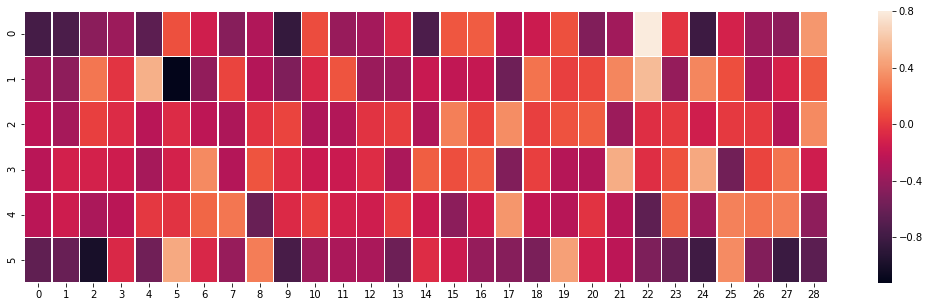

In [21]:
meancorr = np.array(a).mean(axis=0)
f,ax = plt.subplots(figsize=(18,5))
sns.heatmap(meancorr, linewidth = 0.5, ax = ax)


# Effect of demographics on SIM frequency of use 


In [23]:
x = dems.values.reshape(-1,29)
y = data["Q16"].values.reshape(-1,1)
a, b = draw_bs_pairs_log(x, y, size=100)

/Users/Charu/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [143]:
lcoef = []
d = {'Mean': [], 'Min': [], 'Max': []}
dfcoef = pd.DataFrame(data = d)

for i in range (29): 
    for j in range (1):
        acoef = []
        for k in range (100): 
            acoef.append(a[k][j,i])
        lcoef.append(acoef)  
    
    stats = [max(lcoef[i]), mean(lcoef[i]), min(lcoef[i])]
    dfcoef.loc[i] = stats


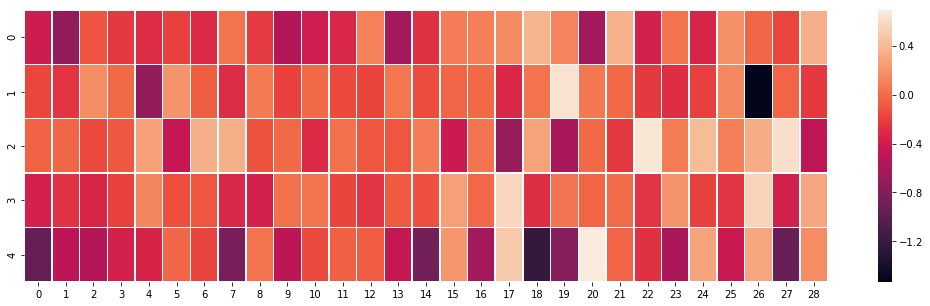

In [25]:
meancorr = np.array(a).mean(axis=0)
f,ax = plt.subplots(figsize=(18,5))
sns.heatmap(meancorr, linewidth = 0.5, ax = ax)

In [26]:
list1 = []
list2 = []
list3 = []
list4 = []
list5 = []

for i in range(100):
    for j in range(29):
        list1.append(a[i][0,j])
        list2.append(a[i][1,j])
        list3.append(a[i][2,j])
        list4.append(a[i][3,j])
        list5.append(a[i][4,j])

array_1 = np.reshape(list1,(100,29))
array_2 = np.reshape(list2,(100,29))
array_3 = np.reshape(list3,(100,29))
array_4 = np.reshape(list4,(100,29))
array_5 = np.reshape(list5,(100,29))


In [27]:
mean_list1 = []

for i in range(29):
   mean_list1.append(((array_1[:,i]>0).mean(), (array_1[:,i]<0).mean(), array_1[:,i].mean()))
    
dfcoef1 = pd.DataFrame(mean_list1)

dfcoef1.columns = ["Positive_1", "Negative_1", "Mean_1"]
dfcoef1
dfcoef1.to_csv('LogRegTables/1a_dems_to_freq_SIM_1.csv')    

sig_means = []
                    
for i in range(29):
    if dfcoef1["Positive_1"].loc[i] < 0.05: 
        sig_means.append(((i, dfcoef1["Positive_1"].loc[i], dfcoef1["Mean_1"].loc[i])))
    
sig_means      

[(0, 0.03, -0.40417888144104613),
 (1, 0.0, -0.7206249263237768),
 (6, 0.0, -0.30709155648112973),
 (9, 0.0, -0.5448784294466581),
 (13, 0.01, -0.6263997351166376),
 (20, 0.03, -0.6282423014459687)]

In [28]:
mean_list2 = []

for i in range(29):
   mean_list2.append(((array_2[:,i]>0).mean(), (array_2[:,i]<0).mean(), array_2[:,i].mean()))
    
dfcoef2 = pd.DataFrame(mean_list2)

dfcoef2.columns = ["Positive_2", "Negative_2", "Mean_2"]
dfcoef2.to_csv('LogRegTables/1a_dems_to_freq_SIM_2.csv')    

sig_means = []
                    
for i in range(29):
    if dfcoef2["Positive_2"].loc[i] < 0.05: 
        sig_means.append(((i, dfcoef2["Positive_2"].loc[i], dfcoef2["Mean_2"].loc[i])))
    
sig_means 

[(4, 0.0, -0.7048972824349535), (26, 0.0, -1.5291164783330038)]

In [29]:
mean_list3 = []

for i in range(29):
   mean_list3.append(((array_3[:,i]>0).mean(), (array_3[:,i]<0).mean(), array_3[:,i].mean()))
    
dfcoef3 = pd.DataFrame(mean_list3)

dfcoef3.columns = ["Positive_3", "Negative_3", "Mean_3"]
dfcoef3.to_csv('LogRegTables/1a_dems_to_freq_SIM_3.csv')    

sig_means = []
                    
for i in range(29):
    if dfcoef3["Positive_3"].loc[i] < 0.05 or dfcoef3["Positive_3"].loc[i] > 0.95: 
        sig_means.append(((i, dfcoef3["Positive_3"].loc[i], dfcoef3["Mean_3"].loc[i])))
    
sig_means 

[(15, 0.03, -0.4280872018021054),
 (17, 0.01, -0.6940953667621653),
 (19, 0.0, -0.6054285249763239),
 (22, 0.99, 0.651834575920756),
 (27, 0.99, 0.6181731505664476)]

In [30]:
mean_list4 = []

for i in range(29):
   mean_list4.append(((array_4[:,i]>0).mean(), (array_4[:,i]<0).mean(), array_4[:,i].mean()))
    
dfcoef4 = pd.DataFrame(mean_list4)

dfcoef4.columns = ["Positive_4", "Negative_4", "Mean_4"]
dfcoef4.to_csv('LogRegTables/1a_dems_to_freq_SIM_4.csv')    

sig_means = []
                    
for i in range(29):
    if dfcoef4["Positive_4"].loc[i] < 0.05 or dfcoef4["Positive_4"].loc[i] > 0.95: 
        sig_means.append(((i, dfcoef4["Positive_4"].loc[i], dfcoef4["Mean_4"].loc[i])))
    
sig_means 

[(0, 0.02, -0.36502581970430137),
 (8, 0.02, -0.36032918730634117),
 (17, 0.97, 0.5600785819279771)]

In [31]:
mean_list5 = []

for i in range(29):
   mean_list5.append(((array_5[:,i]>0).mean(), (array_5[:,i]<0).mean(), array_5[:,i].mean()))
    
dfcoef5 = pd.DataFrame(mean_list5)

dfcoef5.columns = ["Positive_5", "Negative_5", "Mean_5"]
dfcoef5.to_csv('LogRegTables/1a_dems_to_freq_SIM_5.csv')    

sig_means = []
                    
for i in range(29):
    if dfcoef5["Positive_5"].loc[i] < 0.05 or dfcoef5["Positive_5"].loc[i] > 0.95: 
        sig_means.append(((i, dfcoef5["Positive_5"].loc[i], dfcoef5["Mean_5"].loc[i])))
    
sig_means 

[(0, 0.0, -0.9428060396327631),
 (1, 0.0, -0.5052743376757699),
 (6, 0.0, -0.16889060491244115),
 (7, 0.0, -0.8518175490791505),
 (14, 0.0, -0.8733884224552395),
 (17, 0.98, 0.4969559825129975),
 (18, 0.0, -1.2213928418844842),
 (19, 0.02, -0.7797452611581888),
 (20, 0.99, 0.6900718751393738),
 (27, 0.0, -0.9352580206071279)]

# Effect of demographics on DA use 

In [32]:
DAuse = data.loc[:,"Q9.1":"Q9.5"]

In [142]:
x = dems.values.reshape(-1,29)
y = data["Q9.1"].values.reshape(-1,1)
a, b = draw_bs_pairs_log(x, y, size=100)



/Users/Charu/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


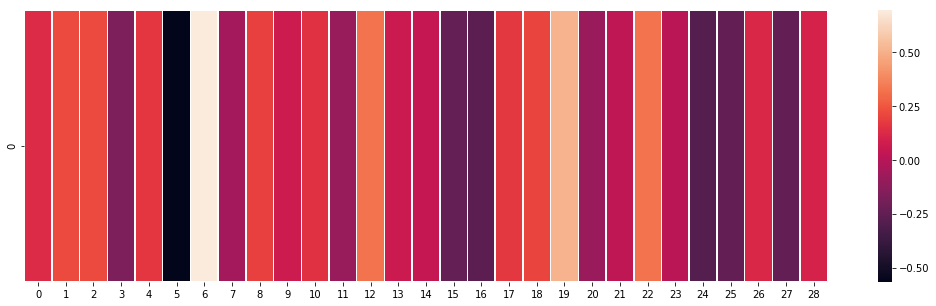

In [34]:
meancoef = np.array(a).mean(axis=0)
f,ax = plt.subplots(figsize=(18,5))
sns.heatmap(meancoef, linewidth = 0.5, ax = ax)

In [35]:
meancoef = np.array(a[0][0][0])
meancoef

array(0.35557264)

In [36]:
list1 = []

for i in range(100):
    for j in range(29):
        list1.append(a[i][0,j])
        
array_1 = np.reshape(list1,(100,29))


In [37]:
mean_list = []

for i in range(29):
   mean_list.append(((array_1[:,i]>0).mean(), (array_1[:,i]<0).mean(), array_1[:,i].mean()))
    
dfcoef = pd.DataFrame(mean_list)

dfcoef.columns = ["Positive", "Negative", "Mean"]
dfcoef
dfcoef.to_csv('LogRegTables/1a_dems_to_use_DA_.csv')    

sig_means = []
                    
for i in range(29):
    if dfcoef["Positive"].loc[i] <= 0.05 or dfcoef["Positive"].loc[i] >= 0.95:
        sig_means.append(((i, dfcoef["Positive"].loc[i], dfcoef["Mean"].loc[i])))
    
sig_means     

[(5, 0.05, -0.5658659936381608),
 (6, 0.96, 0.6965682597301357),
 (12, 0.95, 0.3248814223334781),
 (19, 0.97, 0.5094156058180335)]

In [38]:
lcoef = []
d = {'Mean': [], 'Min': [], 'Max': []}
dfcoef = pd.DataFrame(data = d)

for i in range (29): 
    for j in range (1):
        acoef = []
        for k in range (100): 
            acoef.append(a[k][j,i])
        lcoef.append(acoef)  
    
    stats = [max(lcoef[i]), mean(lcoef[i]), min(lcoef[i])]
    dfcoef.loc[i] = stats
dfcoef
dfcoef.to_csv('LogRegTables/1b_dems_to_uses_DA_0.csv')

In [39]:
x = dems.values.reshape(-1,29)
y = data["Q9.2"].values.reshape(-1,1)
a, b = draw_bs_pairs_log(x, y, size=100)


/Users/Charu/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [40]:
list1 = []

for i in range(100):
    for j in range(29):
        list1.append(a[i][0,j])
        
array_1 = np.reshape(list1,(100,29))


In [41]:
mean_list = []

for i in range(29):
   mean_list.append(((array_1[:,i]>0).mean(), (array_1[:,i]<0).mean(), array_1[:,i].mean()))
    
dfcoef = pd.DataFrame(mean_list)

dfcoef.columns = ["Positive", "Negative", "Mean"]
dfcoef
dfcoef.to_csv('LogRegTables/1a_dems_to_use_DA_2.csv')    

sig_means = []
                    
for i in range(29):
    if dfcoef["Positive"].loc[i] <= 0.05 or dfcoef["Positive"].loc[i] >= 0.95:
        sig_means.append(((i, dfcoef["Positive"].loc[i], dfcoef["Mean"].loc[i])))
    
sig_means     

[(0, 1.0, 0.7114777162261723),
 (6, 0.97, 0.4024230977236556),
 (8, 0.97, 0.4178714617285347),
 (10, 0.98, 0.4406366610888548),
 (13, 0.95, 0.4202828284463022),
 (24, 0.95, 0.46557958392817494),
 (25, 0.03, -0.5405520033793109),
 (26, 0.97, 0.6345749166460052)]

In [42]:
x = dems.values.reshape(-1,29)
y = data["Q9.3"].values.reshape(-1,1)
a, b = draw_bs_pairs_log(x, y, size=100)

/Users/Charu/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [43]:
list1 = []

for i in range(100):
    for j in range(29):
        list1.append(a[i][0,j])
        
array_1 = np.reshape(list1,(100,29))
array_1

mean_list = []

for i in range(29):
   mean_list.append(((array_1[:,i]>0).mean(), (array_1[:,i]<0).mean(), array_1[:,i].mean()))
    
dfcoef = pd.DataFrame(mean_list)

dfcoef.columns = ["Positive", "Negative", "Mean"]
dfcoef
dfcoef.to_csv('LogRegTables/1a_dems_to_use_DA_3.csv')    

sig_means = []
                    
for i in range(29):
    if dfcoef["Positive"].loc[i] <= 0.05 or dfcoef["Positive"].loc[i] >= 0.95:
        sig_means.append(((i, dfcoef["Positive"].loc[i], dfcoef["Mean"].loc[i])))
    
sig_means 

[(1, 0.98, 0.37123796716151297),
 (6, 1.0, 0.7301291148966003),
 (10, 0.96, 0.4163545345798717),
 (22, 0.03, -0.4644406428190196),
 (26, 1.0, 0.9343361873927064),
 (28, 0.01, -0.6705400305004197)]

In [44]:
lcoef = []
d = {'Mean': [], 'Min': [], 'Max': []}
dfcoef = pd.DataFrame(data = d)

for i in range (29): 
    for j in range (1):
        acoef = []
        for k in range (100): 
            acoef.append(a[k][j,i])
        lcoef.append(acoef)  
    
    stats = [max(lcoef[i]), mean(lcoef[i]), min(lcoef[i])]
    dfcoef.loc[i] = stats
dfcoef
dfcoef.to_csv('LogRegTables/1b_dems_to_uses_DA_2.csv')

In [45]:
x = dems.values.reshape(-1,29)
y = data["Q9.4"].values.reshape(-1,1)
a, b = draw_bs_pairs_log(x, y, size=100)

/Users/Charu/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [46]:
list1 = []

for i in range(100):
    for j in range(29):
        list1.append(a[i][0,j])
        
array_1 = np.reshape(list1,(100,29))
array_1

mean_list = []

for i in range(29):
   mean_list.append(((array_1[:,i]>0).mean(), (array_1[:,i]<0).mean(), array_1[:,i].mean()))
    
dfcoef = pd.DataFrame(mean_list)

dfcoef.columns = ["Positive", "Negative", "Mean"]
dfcoef
dfcoef.to_csv('LogRegTables/1a_dems_to_use_DA_4.csv')    

sig_means = []
                    
for i in range(29):
    if dfcoef["Positive"].loc[i] <= 0.05 or dfcoef["Positive"].loc[i] >= 0.95:
        sig_means.append(((i, dfcoef["Positive"].loc[i], dfcoef["Mean"].loc[i])))
    
sig_means 

[(0, 0.04, -0.20737368221177255),
 (1, 0.01, -0.24420132105923845),
 (5, 0.03, -0.6786347612977417),
 (10, 0.02, -0.42019521681706284)]

In [47]:
lcoef = []
d = {'Mean': [], 'Min': [], 'Max': []}
dfcoef = pd.DataFrame(data = d)

for i in range (29): 
    for j in range (1):
        acoef = []
        for k in range (100): 
            acoef.append(a[k][j,i])
        lcoef.append(acoef)  
    
    stats = [max(lcoef[i]), mean(lcoef[i]), min(lcoef[i])]
    dfcoef.loc[i] = stats
dfcoef
dfcoef.to_csv('LogRegTables/1b_dems_to_uses_DA_3.csv')

In [48]:
x = dems.values.reshape(-1,29)
y = data["Q9.5"].values.reshape(-1,1)
a, b = draw_bs_pairs_log(x, y, size=100)

/Users/Charu/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [49]:
list1 = []

for i in range(100):
    for j in range(29):
        list1.append(a[i][0,j])
        
array_1 = np.reshape(list1,(100,29))
array_1

mean_list = []

for i in range(29):
   mean_list.append(((array_1[:,i]>0).mean(), (array_1[:,i]<0).mean(), array_1[:,i].mean()))
    
dfcoef = pd.DataFrame(mean_list)

dfcoef.columns = ["Positive", "Negative", "Mean"]
dfcoef
dfcoef.to_csv('LogRegTables/1a_dems_to_use_DA_5.csv')    

sig_means = []
                    
for i in range(29):
    if dfcoef["Positive"].loc[i] <= 0.05 or dfcoef["Positive"].loc[i] >= 0.95:
        sig_means.append(((i, dfcoef["Positive"].loc[i], dfcoef["Mean"].loc[i])))
    
sig_means 

[(1, 0.02, -0.38560315355517116),
 (4, 0.01, -0.5942106362228293),
 (19, 0.95, 0.4610705986832697),
 (27, 0.98, 0.5179119156466563)]

In [50]:
lcoef = []
d = {'Mean': [], 'Min': [], 'Max': []}
dfcoef = pd.DataFrame(data = d)

for i in range (29): 
    for j in range (1):
        acoef = []
        for k in range (100): 
            acoef.append(a[k][j,i])
        lcoef.append(acoef)  
    
    stats = [max(lcoef[i]), mean(lcoef[i]), min(lcoef[i])]
    dfcoef.loc[i] = stats
dfcoef
dfcoef.to_csv('LogRegTables/1b_dems_to_uses_DA_4.csv')

# Effect on DA use on DA steps (design process)


In [51]:
x = DAuse.values.reshape(-1,5)
y = data["Q11.1"].values.reshape(-1,1)
a, b = draw_bs_pairs_log(x, y, size=100)


/Users/Charu/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [52]:
list0 = []
list1 = []
list2 = []
list3 = []
list4 = []


for i in range(100):
    for j in range(5):
        list0.append(a[i][0,j])
        list1.append(a[i][1,j])
        list2.append(a[i][2,j])
        list3.append(a[i][3,j])
        list4.append(a[i][4,j])
      

array_0 = np.reshape(list0,(100,5))        
array_1 = np.reshape(list1,(100,5))
array_2 = np.reshape(list2,(100,5))
array_3 = np.reshape(list3,(100,5))
array_4 = np.reshape(list4,(100,5))



In [53]:
mean_list = []

for i in range(5):
    mean_list.append(((array_0[:,i]>0).mean(), (array_0[:,i]<0).mean(), array_0[:,i].mean(), 
                        (array_1[:,i]>0).mean(), (array_1[:,i]<0).mean(), array_1[:,i].mean(),
                         (array_2[:,i]>0).mean(), (array_2[:,i]<0).mean(), array_2[:,i].mean(),
                          (array_3[:,i]>0).mean(), (array_3[:,i]<0).mean(), array_3[:,i].mean(),
                           (array_4[:,i]>0).mean(), (array_4[:,i]<0).mean(), array_4[:,i].mean()))
                          

mean_list

dfcoef = pd.DataFrame(mean_list)
dfcoef.columns = ["Postive_0", "Negative_0", "Mean_0",
                  "Postive_1", "Negative_1", "Mean_1",
                  "Postive_2", "Negative_2", "Mean_2",
                  "Postive_3", "Negative_3", "Mean_3",
                  "Postive_4", "Negative_4", "Mean_4"]
dfcoef

dfcoef.to_csv('LogRegTables/2_DAuse_to_process_1.csv')    



In [54]:
lcoef = []
d = {'Mean': [], 'Min': [], 'Max': []}
dfcoef = pd.DataFrame(data = d)

for i in range (5): 
    for j in range (1):
        acoef = []
        for k in range (100): 
            acoef.append(a[k][j,i])
        lcoef.append(acoef)  
    
    stats = [max(lcoef[i]), mean(lcoef[i]), min(lcoef[i])]
    dfcoef.loc[i] = stats
dfcoef

,Max,Mean,Min
0,0.784305,-0.029843,-1.377874
1,0.372091,-0.057798,-0.767868
2,0.197566,-0.473742,-1.167647
3,0.493776,-0.355219,-1.450909
4,0.696975,-0.184793,-1.456645


In [55]:
x = DAuse.values.reshape(-1,5)
y = data["Q11.2"].values.reshape(-1,1)
a, b = draw_bs_pairs_log(x, y, size=100)

/Users/Charu/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [56]:
list0 = []
list1 = []
list2 = []
list3 = []
list4 = []


for i in range(100):
    for j in range(5):
        list0.append(a[i][0,j])
        list1.append(a[i][1,j])
        list2.append(a[i][2,j])
        list3.append(a[i][3,j])
        list4.append(a[i][4,j])
      

array_0 = np.reshape(list0,(100,5))        
array_1 = np.reshape(list1,(100,5))
array_2 = np.reshape(list2,(100,5))
array_3 = np.reshape(list3,(100,5))
array_4 = np.reshape(list4,(100,5))


mean_list = []

for i in range(5):
    mean_list.append(((array_0[:,i]>0).mean(), (array_0[:,i]<0).mean(), array_0[:,i].mean(), 
                        (array_1[:,i]>0).mean(), (array_1[:,i]<0).mean(), array_1[:,i].mean(),
                         (array_2[:,i]>0).mean(), (array_2[:,i]<0).mean(), array_2[:,i].mean(),
                          (array_3[:,i]>0).mean(), (array_3[:,i]<0).mean(), array_3[:,i].mean(),
                           (array_4[:,i]>0).mean(), (array_4[:,i]<0).mean(), array_4[:,i].mean()))
                          

mean_list

dfcoef = pd.DataFrame(mean_list)
dfcoef.columns = ["Postive_0", "Negative_0", "Mean_0",
                  "Postive_1", "Negative_1", "Mean_1",
                  "Postive_2", "Negative_2", "Mean_2",
                  "Postive_3", "Negative_3", "Mean_3",
                  "Postive_4", "Negative_4", "Mean_4"]
dfcoef

dfcoef.to_csv('LogRegTables/2_DAuse_to_process_2.csv')    


In [57]:
x = DAuse.values.reshape(-1,5)
y = data["Q11.3"].values.reshape(-1,1)
a, b = draw_bs_pairs_log(x, y, size=100)

/Users/Charu/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [58]:
list0 = []
list1 = []
list2 = []
list3 = []
list4 = []


for i in range(100):
    for j in range(5):
        list0.append(a[i][0,j])
        list1.append(a[i][1,j])
        list2.append(a[i][2,j])
        list3.append(a[i][3,j])
        list4.append(a[i][4,j])
      

array_0 = np.reshape(list0,(100,5))        
array_1 = np.reshape(list1,(100,5))
array_2 = np.reshape(list2,(100,5))
array_3 = np.reshape(list3,(100,5))
array_4 = np.reshape(list4,(100,5))


mean_list = []

for i in range(5):
    mean_list.append(((array_0[:,i]>0).mean(), (array_0[:,i]<0).mean(), array_0[:,i].mean(), 
                        (array_1[:,i]>0).mean(), (array_1[:,i]<0).mean(), array_1[:,i].mean(),
                         (array_2[:,i]>0).mean(), (array_2[:,i]<0).mean(), array_2[:,i].mean(),
                          (array_3[:,i]>0).mean(), (array_3[:,i]<0).mean(), array_3[:,i].mean(),
                           (array_4[:,i]>0).mean(), (array_4[:,i]<0).mean(), array_4[:,i].mean()))
                          

mean_list

dfcoef = pd.DataFrame(mean_list)
dfcoef.columns = ["Postive_0", "Negative_0", "Mean_0",
                  "Postive_1", "Negative_1", "Mean_1",
                  "Postive_2", "Negative_2", "Mean_2",
                  "Postive_3", "Negative_3", "Mean_3",
                  "Postive_4", "Negative_4", "Mean_4"]
dfcoef

dfcoef.to_csv('LogRegTables/2_DAuse_to_process_3.csv')  

In [59]:
x = DAuse.values.reshape(-1,5)
y = data["Q11.4"].values.reshape(-1,1)
a, b = draw_bs_pairs_log(x, y, size=100)

/Users/Charu/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [60]:
list0 = []
list1 = []
list2 = []
list3 = []
list4 = []


for i in range(100):
    for j in range(5):
        list0.append(a[i][0,j])
        list1.append(a[i][1,j])
        list2.append(a[i][2,j])
        list3.append(a[i][3,j])
        list4.append(a[i][4,j])
      

array_0 = np.reshape(list0,(100,5))        
array_1 = np.reshape(list1,(100,5))
array_2 = np.reshape(list2,(100,5))
array_3 = np.reshape(list3,(100,5))
array_4 = np.reshape(list4,(100,5))


mean_list = []

for i in range(5):
    mean_list.append(((array_0[:,i]>0).mean(), (array_0[:,i]<0).mean(), array_0[:,i].mean(), 
                        (array_1[:,i]>0).mean(), (array_1[:,i]<0).mean(), array_1[:,i].mean(),
                         (array_2[:,i]>0).mean(), (array_2[:,i]<0).mean(), array_2[:,i].mean(),
                          (array_3[:,i]>0).mean(), (array_3[:,i]<0).mean(), array_3[:,i].mean(),
                           (array_4[:,i]>0).mean(), (array_4[:,i]<0).mean(), array_4[:,i].mean()))
                          

mean_list

dfcoef = pd.DataFrame(mean_list)
dfcoef.columns = ["Postive_0", "Negative_0", "Mean_0",
                  "Postive_1", "Negative_1", "Mean_1",
                  "Postive_2", "Negative_2", "Mean_2",
                  "Postive_3", "Negative_3", "Mean_3",
                  "Postive_4", "Negative_4", "Mean_4"]
dfcoef

dfcoef.to_csv('LogRegTables/2_DAuse_to_process_4.csv')  

In [61]:
x = DAuse.values.reshape(-1,5)
y = data["Q11.5"].values.reshape(-1,1)
a, b = draw_bs_pairs_log(x, y, size=100)

/Users/Charu/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [62]:
list0 = []
list1 = []
list2 = []
list3 = []
list4 = []


for i in range(100):
    for j in range(5):
        list0.append(a[i][0,j])
        list1.append(a[i][1,j])
        list2.append(a[i][2,j])
        list3.append(a[i][3,j])
        list4.append(a[i][4,j])
      

array_0 = np.reshape(list0,(100,5))        
array_1 = np.reshape(list1,(100,5))
array_2 = np.reshape(list2,(100,5))
array_3 = np.reshape(list3,(100,5))
array_4 = np.reshape(list4,(100,5))


mean_list = []

for i in range(5):
    mean_list.append(((array_0[:,i]>0).mean(), (array_0[:,i]<0).mean(), array_0[:,i].mean(), 
                        (array_1[:,i]>0).mean(), (array_1[:,i]<0).mean(), array_1[:,i].mean(),
                         (array_2[:,i]>0).mean(), (array_2[:,i]<0).mean(), array_2[:,i].mean(),
                          (array_3[:,i]>0).mean(), (array_3[:,i]<0).mean(), array_3[:,i].mean(),
                           (array_4[:,i]>0).mean(), (array_4[:,i]<0).mean(), array_4[:,i].mean()))
                          

mean_list

dfcoef = pd.DataFrame(mean_list)
dfcoef.columns = ["Postive_0", "Negative_0", "Mean_0",
                  "Postive_1", "Negative_1", "Mean_1",
                  "Postive_2", "Negative_2", "Mean_2",
                  "Postive_3", "Negative_3", "Mean_3",
                  "Postive_4", "Negative_4", "Mean_4"]
dfcoef

dfcoef.to_csv('LogRegTables/2_DAuse_to_process_5.csv') 

In [63]:
x = DAuse.values.reshape(-1,5)
y = data["Q11.6"].values.reshape(-1,1)
a, b = draw_bs_pairs_log(x, y, size=100)

/Users/Charu/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [64]:
list0 = []
list1 = []
list2 = []
list3 = []
list4 = []


for i in range(100):
    for j in range(5):
        list0.append(a[i][0,j])
        list1.append(a[i][1,j])
        list2.append(a[i][2,j])
        list3.append(a[i][3,j])
        list4.append(a[i][4,j])
      

array_0 = np.reshape(list0,(100,5))        
array_1 = np.reshape(list1,(100,5))
array_2 = np.reshape(list2,(100,5))
array_3 = np.reshape(list3,(100,5))
array_4 = np.reshape(list4,(100,5))


mean_list = []

for i in range(5):
    mean_list.append(((array_0[:,i]>0).mean(), (array_0[:,i]<0).mean(), array_0[:,i].mean(), 
                        (array_1[:,i]>0).mean(), (array_1[:,i]<0).mean(), array_1[:,i].mean(),
                         (array_2[:,i]>0).mean(), (array_2[:,i]<0).mean(), array_2[:,i].mean(),
                          (array_3[:,i]>0).mean(), (array_3[:,i]<0).mean(), array_3[:,i].mean(),
                           (array_4[:,i]>0).mean(), (array_4[:,i]<0).mean(), array_4[:,i].mean()))
                          

mean_list

dfcoef = pd.DataFrame(mean_list)
dfcoef.columns = ["Postive_0", "Negative_0", "Mean_0",
                  "Postive_1", "Negative_1", "Mean_1",
                  "Postive_2", "Negative_2", "Mean_2",
                  "Postive_3", "Negative_3", "Mean_3",
                  "Postive_4", "Negative_4", "Mean_4"]
dfcoef

dfcoef.to_csv('LogRegTables/2_DAuse_to_process_6.csv') 

In [65]:
x = DAuse.values.reshape(-1,5)
y = data["Q11.7"].values.reshape(-1,1)
a, b = draw_bs_pairs_log(x, y, size=100)

/Users/Charu/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [66]:
list0 = []
list1 = []
list2 = []
list3 = []
list4 = []


for i in range(100):
    for j in range(5):
        list0.append(a[i][0,j])
        list1.append(a[i][1,j])
        list2.append(a[i][2,j])
        list3.append(a[i][3,j])
        list4.append(a[i][4,j])
      

array_0 = np.reshape(list0,(100,5))        
array_1 = np.reshape(list1,(100,5))
array_2 = np.reshape(list2,(100,5))
array_3 = np.reshape(list3,(100,5))
array_4 = np.reshape(list4,(100,5))


mean_list = []

for i in range(5):
    mean_list.append(((array_0[:,i]>0).mean(), (array_0[:,i]<0).mean(), array_0[:,i].mean(), 
                        (array_1[:,i]>0).mean(), (array_1[:,i]<0).mean(), array_1[:,i].mean(),
                         (array_2[:,i]>0).mean(), (array_2[:,i]<0).mean(), array_2[:,i].mean(),
                          (array_3[:,i]>0).mean(), (array_3[:,i]<0).mean(), array_3[:,i].mean(),
                           (array_4[:,i]>0).mean(), (array_4[:,i]<0).mean(), array_4[:,i].mean()))
                          

mean_list

dfcoef = pd.DataFrame(mean_list)
dfcoef.columns = ["Postive_0", "Negative_0", "Mean_0",
                  "Postive_1", "Negative_1", "Mean_1",
                  "Postive_2", "Negative_2", "Mean_2",
                  "Postive_3", "Negative_3", "Mean_3",
                  "Postive_4", "Negative_4", "Mean_4"]
dfcoef

dfcoef.to_csv('LogRegTables/2_DAuse_to_process_7.csv')

# Effect of DA use on DA issue

In [67]:
x = DAuse.values.reshape(-1,5)
y = data["Q12.1"].values.reshape(-1,1)
a, b = draw_bs_pairs_log(x, y, size=100)

/Users/Charu/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [68]:
list1 = []

for i in range(100):
    for j in range(5):
        list1.append(a[i][0,j])
        
array_1 = np.reshape(list1,(100,5))


In [69]:
lcoef = []
d = {'Mean': [], 'Min': [], 'Max': []}
dfcoef = pd.DataFrame(data = d)

for i in range (5): 
    for j in range (1):
        acoef = []
        for k in range (100): 
            acoef.append(a[k][j,i])
        lcoef.append(acoef)  
    
    stats = [max(lcoef[i]), mean(lcoef[i]), min(lcoef[i])]
    dfcoef.loc[i] = stats
dfcoef

,Max,Mean,Min
0,0.640679,0.120292,-0.297794
1,1.077249,0.485373,-0.186817
2,0.365957,-0.113768,-0.672157
3,0.559044,0.056928,-0.504422
4,0.396146,-0.090346,-0.490411


In [70]:
mean_list = []

for i in range(5):
   mean_list.append(((array_1[:,i]>0).mean(), (array_1[:,i]<0).mean(), array_1[:,i].mean()))
    
dfcoef = pd.DataFrame(mean_list)

dfcoef.columns = ["Positive", "Negative", "Mean"]
dfcoef
dfcoef.to_csv('LogRegTables/3a_DAuse_to_issue1.csv')    

sig_means = []
                    
for i in range(5):
    if dfcoef["Positive"].loc[i] <= 0.05 or dfcoef["Positive"].loc[i] >= 0.95:
        sig_means.append(((i, dfcoef["Positive"].loc[i], dfcoef["Mean"].loc[i])))
    
sig_means

[(1, 0.97, 0.4853730751380389)]

In [71]:
x = DAuse.values.reshape(-1,5)
y = data["Q12.2"].values.reshape(-1,1)
a, b = draw_bs_pairs_log(x, y, size=100)

/Users/Charu/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [72]:
list1 = []

for i in range(100):
    for j in range(5):
        list1.append(a[i][0,j])
        
array_1 = np.reshape(list1,(100,5))

mean_list = []

for i in range(5):
   mean_list.append(((array_1[:,i]>0).mean(), (array_1[:,i]<0).mean(), array_1[:,i].mean()))
    
dfcoef = pd.DataFrame(mean_list)

dfcoef.columns = ["Positive", "Negative", "Mean"]
dfcoef
dfcoef.to_csv('LogRegTables/3a_DAuse_to_issue2.csv')    

sig_means = []
                    
for i in range(5):
    if dfcoef["Positive"].loc[i] <= 0.05 or dfcoef["Positive"].loc[i] >= 0.95:
        sig_means.append(((i, dfcoef["Positive"].loc[i], dfcoef["Mean"].loc[i])))
    
sig_means

[(1, 0.97, 0.4483138239943131)]

In [73]:
lcoef = []
d = {'Mean': [], 'Min': [], 'Max': []}
dfcoef = pd.DataFrame(data = d)

for i in range (5): 
    for j in range (1):
        acoef = []
        for k in range (100): 
            acoef.append(a[k][j,i])
        lcoef.append(acoef)  
    
    stats = [max(lcoef[i]), mean(lcoef[i]), min(lcoef[i])]
    dfcoef.loc[i] = stats
dfcoef

,Max,Mean,Min
0,0.404046,-0.105706,-0.549766
1,1.120183,0.448314,-0.104320
2,0.374117,-0.136795,-0.639028
3,0.830846,0.305476,-0.289048
4,0.357274,-0.126116,-0.809150


In [74]:
x = DAuse.values.reshape(-1,5)
y = data["Q12.3"].values.reshape(-1,1)
a, b = draw_bs_pairs_log(x, y, size=100)

/Users/Charu/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [75]:
list1 = []

for i in range(100):
    for j in range(5):
        list1.append(a[i][0,j])
        
array_1 = np.reshape(list1,(100,5))

mean_list = []

for i in range(5):
   mean_list.append(((array_1[:,i]>0).mean(), (array_1[:,i]<0).mean(), array_1[:,i].mean()))
    
dfcoef = pd.DataFrame(mean_list)

dfcoef.columns = ["Positive", "Negative", "Mean"]
dfcoef
dfcoef.to_csv('LogRegTables/3a_DAuse_to_issue3.csv')    

sig_means = []
                    
for i in range(5):
    if dfcoef["Positive"].loc[i] <= 0.05 or dfcoef["Positive"].loc[i] >= 0.95:
        sig_means.append(((i, dfcoef["Positive"].loc[i], dfcoef["Mean"].loc[i])))
    
sig_means

[]

In [76]:
lcoef = []
d = {'Mean': [], 'Min': [], 'Max': []}
dfcoef = pd.DataFrame(data = d)

for i in range (5): 
    for j in range (1):
        acoef = []
        for k in range (100): 
            acoef.append(a[k][j,i])
        lcoef.append(acoef)  
    
    stats = [max(lcoef[i]), mean(lcoef[i]), min(lcoef[i])]
    dfcoef.loc[i] = stats
dfcoef

,Max,Mean,Min
0,1.034669,0.324086,-0.118132
1,0.532839,-0.012310,-0.785982
2,0.230520,-0.262869,-0.738118
3,0.373346,-0.283236,-0.725189
4,0.668501,-0.135915,-0.618378


In [77]:
x = DAuse.values.reshape(-1,5)
y = data["Q12.4"].values.reshape(-1,1)
a, b = draw_bs_pairs_log(x, y, size=100)

/Users/Charu/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [78]:
list1 = []

for i in range(100):
    for j in range(5):
        list1.append(a[i][0,j])
        
array_1 = np.reshape(list1,(100,5))

mean_list = []

for i in range(5):
   mean_list.append(((array_1[:,i]>0).mean(), (array_1[:,i]<0).mean(), array_1[:,i].mean()))
    
dfcoef = pd.DataFrame(mean_list)

dfcoef.columns = ["Positive", "Negative", "Mean"]
dfcoef
dfcoef.to_csv('LogRegTables/3a_DAuse_to_issue4.csv')    

sig_means = []
                    
for i in range(5):
    if dfcoef["Positive"].loc[i] <= 0.05 or dfcoef["Positive"].loc[i] >= 0.95:
        sig_means.append(((i, dfcoef["Positive"].loc[i], dfcoef["Mean"].loc[i])))
    
sig_means

[]

In [79]:
lcoef = []
d = {'Mean': [], 'Min': [], 'Max': []}
dfcoef = pd.DataFrame(data = d)

for i in range (5): 
    for j in range (1):
        acoef = []
        for k in range (100): 
            acoef.append(a[k][j,i])
        lcoef.append(acoef)  
    
    stats = [max(lcoef[i]), mean(lcoef[i]), min(lcoef[i])]
    dfcoef.loc[i] = stats
dfcoef

,Max,Mean,Min
0,0.343327,-0.176305,-0.602833
1,0.689688,-0.006876,-0.629893
2,0.520817,-0.049686,-0.591462
3,0.262917,-0.157026,-0.671116
4,0.540827,-0.046452,-0.563452


# Effect of DA issue on DA improvement 

In [80]:
DAissue = data.loc[:,"Q12.1":"Q12.4"]

In [81]:
x = DAissue.values.reshape(-1,4)
y = data["Q13.1"].values.reshape(-1,1)
a, b = draw_bs_pairs_log(x, y, size=100)

/Users/Charu/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [82]:
list0 = []
list1 = []
list2 = []
list3 = []

for i in range(100):
    for j in range(4):
        list0.append(a[i][0,j])
        list1.append(a[i][1,j])
        list2.append(a[i][2,j])
        list3.append(a[i][3,j])
    
      

array_0 = np.reshape(list0,(100,4))        
array_1 = np.reshape(list1,(100,4))
array_2 = np.reshape(list2,(100,4))
array_3 = np.reshape(list3,(100,4))


mean_list = []

for i in range(4):
    mean_list.append(((array_0[:,i]>0).mean(), (array_0[:,i]<0).mean(), array_0[:,i].mean(), 
                        (array_1[:,i]>0).mean(), (array_1[:,i]<0).mean(), array_1[:,i].mean(),
                         (array_2[:,i]>0).mean(), (array_2[:,i]<0).mean(), array_2[:,i].mean(),
                          (array_3[:,i]>0).mean(), (array_3[:,i]<0).mean(), array_3[:,i].mean()))

mean_list

dfcoef = pd.DataFrame(mean_list)
dfcoef.columns = ["Postive_0", "Negative_0", "Mean_0",
                  "Postive_1", "Negative_1", "Mean_1",
                  "Postive_2", "Negative_2", "Mean_2",
                  "Postive_3", "Negative_3", "Mean_3"]
dfcoef

dfcoef.to_csv('LogRegTables/2_DAissue_to_improve_1.csv')

In [83]:
x = DAissue.values.reshape(-1,4)
y = data["Q13.2"].values.reshape(-1,1)
a, b = draw_bs_pairs_log(x, y, size=100)

list0 = []
list1 = []
list2 = []
list3 = []
list4 = []


for i in range(100):
    for j in range(4):
        list0.append(a[i][0,j])
        list1.append(a[i][1,j])
        list2.append(a[i][2,j])
        list3.append(a[i][3,j])
        list4.append(a[i][4,j])

array_0 = np.reshape(list0,(100,4))        
array_1 = np.reshape(list1,(100,4))
array_2 = np.reshape(list2,(100,4))
array_3 = np.reshape(list3,(100,4))
array_4 = np.reshape(list4,(100,4))

mean_list = []

for i in range(4):
    mean_list.append(((array_0[:,i]>0).mean(), (array_0[:,i]<0).mean(), array_0[:,i].mean(), 
                        (array_1[:,i]>0).mean(), (array_1[:,i]<0).mean(), array_1[:,i].mean(),
                         (array_2[:,i]>0).mean(), (array_2[:,i]<0).mean(), array_2[:,i].mean(),
                          (array_3[:,i]>0).mean(), (array_3[:,i]<0).mean(), array_3[:,i].mean(), 
                           (array_4[:,i]>0).mean(), (array_4[:,i]<0).mean(), array_4[:,i].mean()))

mean_list

dfcoef = pd.DataFrame(mean_list)
dfcoef.columns = ["Postive_0", "Negative_0", "Mean_0",
                  "Postive_1", "Negative_1", "Mean_1",
                  "Postive_2", "Negative_2", "Mean_2",
                  "Postive_3", "Negative_3", "Mean_3", 
                  "Postive_4", "Negative_4", "Mean_4"]
dfcoef

dfcoef.to_csv('LogRegTables/2_DAissue_to_improve_2.csv')

/Users/Charu/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [84]:
x = DAissue.values.reshape(-1,4)
y = data["Q13.3"].values.reshape(-1,1)
a, b = draw_bs_pairs_log(x, y, size=100)

list0 = []
list1 = []
list2 = []
list3 = []
list4 = []


for i in range(100):
    for j in range(4):
        list0.append(a[i][0,j])
        list1.append(a[i][1,j])
        list2.append(a[i][2,j])
        list3.append(a[i][3,j])
        list4.append(a[i][4,j])

array_0 = np.reshape(list0,(100,4))        
array_1 = np.reshape(list1,(100,4))
array_2 = np.reshape(list2,(100,4))
array_3 = np.reshape(list3,(100,4))
array_4 = np.reshape(list4,(100,4))

mean_list = []

for i in range(4):
    mean_list.append(((array_0[:,i]>0).mean(), (array_0[:,i]<0).mean(), array_0[:,i].mean(), 
                        (array_1[:,i]>0).mean(), (array_1[:,i]<0).mean(), array_1[:,i].mean(),
                         (array_2[:,i]>0).mean(), (array_2[:,i]<0).mean(), array_2[:,i].mean(),
                          (array_3[:,i]>0).mean(), (array_3[:,i]<0).mean(), array_3[:,i].mean(), 
                           (array_4[:,i]>0).mean(), (array_4[:,i]<0).mean(), array_4[:,i].mean()))

mean_list

dfcoef = pd.DataFrame(mean_list)
dfcoef.columns = ["Postive_0", "Negative_0", "Mean_0",
                  "Postive_1", "Negative_1", "Mean_1",
                  "Postive_2", "Negative_2", "Mean_2",
                  "Postive_3", "Negative_3", "Mean_3", 
                  "Postive_4", "Negative_4", "Mean_4"]
dfcoef

dfcoef.to_csv('LogRegTables/2_DAissue_to_improve_3.csv')

/Users/Charu/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [85]:
x = DAissue.values.reshape(-1,4)
y = data["Q13.4"].values.reshape(-1,1)
a, b = draw_bs_pairs_log(x, y, size=100)

/Users/Charu/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [86]:
list0 = []
list1 = []
list2 = []
list3 = []



for i in range(100):
    for j in range(4):
        list0.append(a[i][0,j])
        list1.append(a[i][1,j])
        list2.append(a[i][2,j])
        list3.append(a[i][3,j])

array_0 = np.reshape(list0,(100,4))        
array_1 = np.reshape(list1,(100,4))
array_2 = np.reshape(list2,(100,4))
array_3 = np.reshape(list3,(100,4))

mean_list = []

for i in range(4):
    mean_list.append(((array_0[:,i]>0).mean(), (array_0[:,i]<0).mean(), array_0[:,i].mean(), 
                        (array_1[:,i]>0).mean(), (array_1[:,i]<0).mean(), array_1[:,i].mean(),
                         (array_2[:,i]>0).mean(), (array_2[:,i]<0).mean(), array_2[:,i].mean(),
                          (array_3[:,i]>0).mean(), (array_3[:,i]<0).mean(), array_3[:,i].mean()))

mean_list

dfcoef = pd.DataFrame(mean_list)
dfcoef.columns = ["Postive_0", "Negative_0", "Mean_0",
                  "Postive_1", "Negative_1", "Mean_1",
                  "Postive_2", "Negative_2", "Mean_2",
                  "Postive_3", "Negative_3", "Mean_3"]
dfcoef

dfcoef.to_csv('LogRegTables/2_DAissue_to_improve_4.csv')

In [87]:
x = DAissue.values.reshape(-1,4)
y = data["Q13.5"].values.reshape(-1,1)
a, b = draw_bs_pairs_log(x, y, size=100)

list0 = []
list1 = []
list2 = []
list3 = []


for i in range(100):
    for j in range(4):
        list0.append(a[i][0,j])
        list1.append(a[i][1,j])
        list2.append(a[i][2,j])
        list3.append(a[i][3,j])

array_0 = np.reshape(list0,(100,4))        
array_1 = np.reshape(list1,(100,4))
array_2 = np.reshape(list2,(100,4))
array_3 = np.reshape(list3,(100,4))

mean_list = []

for i in range(4):
    mean_list.append(((array_0[:,i]>0).mean(), (array_0[:,i]<0).mean(), array_0[:,i].mean(), 
                        (array_1[:,i]>0).mean(), (array_1[:,i]<0).mean(), array_1[:,i].mean(),
                         (array_2[:,i]>0).mean(), (array_2[:,i]<0).mean(), array_2[:,i].mean(),
                          (array_3[:,i]>0).mean(), (array_3[:,i]<0).mean(), array_3[:,i].mean())) 

mean_list

dfcoef = pd.DataFrame(mean_list)
dfcoef.columns = ["Postive_0", "Negative_0", "Mean_0",
                  "Postive_1", "Negative_1", "Mean_1",
                  "Postive_2", "Negative_2", "Mean_2",
                  "Postive_3", "Negative_3", "Mean_3"] 
dfcoef

dfcoef.to_csv('LogRegTables/2_DAissue_to_improve_5.csv')

/Users/Charu/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [88]:
x = DAissue.values.reshape(-1,4)
y = data["Q13.6"].values.reshape(-1,1)
a, b = draw_bs_pairs_log(x, y, size=100)

list0 = []
list1 = []
list2 = []
list3 = []


for i in range(100):
    for j in range(4):
        list0.append(a[i][0,j])
        list1.append(a[i][1,j])
        list2.append(a[i][2,j])
        list3.append(a[i][3,j])

array_0 = np.reshape(list0,(100,4))        
array_1 = np.reshape(list1,(100,4))
array_2 = np.reshape(list2,(100,4))
array_3 = np.reshape(list3,(100,4))

mean_list = []

for i in range(4):
    mean_list.append(((array_0[:,i]>0).mean(), (array_0[:,i]<0).mean(), array_0[:,i].mean(), 
                        (array_1[:,i]>0).mean(), (array_1[:,i]<0).mean(), array_1[:,i].mean(),
                         (array_2[:,i]>0).mean(), (array_2[:,i]<0).mean(), array_2[:,i].mean(),
                          (array_3[:,i]>0).mean(), (array_3[:,i]<0).mean(), array_3[:,i].mean())) 

mean_list

dfcoef = pd.DataFrame(mean_list)
dfcoef.columns = ["Postive_0", "Negative_0", "Mean_0",
                  "Postive_1", "Negative_1", "Mean_1",
                  "Postive_2", "Negative_2", "Mean_2",
                  "Postive_3", "Negative_3", "Mean_3"] 
dfcoef

dfcoef.to_csv('LogRegTables/2_DAissue_to_improve_6.csv')

/Users/Charu/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [89]:
x = DAissue.values.reshape(-1,4)
y = data["Q13.7"].values.reshape(-1,1)
a, b = draw_bs_pairs_log(x, y, size=100)

list0 = []
list1 = []
list2 = []
list3 = []


for i in range(100):
    for j in range(4):
        list0.append(a[i][0,j])
        list1.append(a[i][1,j])
        list2.append(a[i][2,j])
        list3.append(a[i][3,j])

array_0 = np.reshape(list0,(100,4))        
array_1 = np.reshape(list1,(100,4))
array_2 = np.reshape(list2,(100,4))
array_3 = np.reshape(list3,(100,4))

mean_list = []

for i in range(4):
    mean_list.append(((array_0[:,i]>0).mean(), (array_0[:,i]<0).mean(), array_0[:,i].mean(), 
                        (array_1[:,i]>0).mean(), (array_1[:,i]<0).mean(), array_1[:,i].mean(),
                         (array_2[:,i]>0).mean(), (array_2[:,i]<0).mean(), array_2[:,i].mean(),
                          (array_3[:,i]>0).mean(), (array_3[:,i]<0).mean(), array_3[:,i].mean())) 

mean_list

dfcoef = pd.DataFrame(mean_list)
dfcoef.columns = ["Postive_0", "Negative_0", "Mean_0",
                  "Postive_1", "Negative_1", "Mean_1",
                  "Postive_2", "Negative_2", "Mean_2",
                  "Postive_3", "Negative_3", "Mean_3"] 
dfcoef

dfcoef.to_csv('LogRegTables/2_DAissue_to_improve_7.csv')

/Users/Charu/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [90]:
x = DAissue.values.reshape(-1,4)
y = data["Q13.8"].values.reshape(-1,1)
a, b = draw_bs_pairs_log(x, y, size=100)

list0 = []
list1 = []
list2 = []



for i in range(100):
    for j in range(4):
        list0.append(a[i][0,j])
        list1.append(a[i][1,j])
        list2.append(a[i][2,j])

array_0 = np.reshape(list0,(100,4))        
array_1 = np.reshape(list1,(100,4))
array_2 = np.reshape(list2,(100,4))

mean_list = []

for i in range(4):
    mean_list.append(((array_0[:,i]>0).mean(), (array_0[:,i]<0).mean(), array_0[:,i].mean(), 
                        (array_1[:,i]>0).mean(), (array_1[:,i]<0).mean(), array_1[:,i].mean(),
                         (array_2[:,i]>0).mean(), (array_2[:,i]<0).mean(), array_2[:,i].mean()))

mean_list

dfcoef = pd.DataFrame(mean_list)
dfcoef.columns = ["Postive_0", "Negative_0", "Mean_0",
                  "Postive_1", "Negative_1", "Mean_1",
                  "Postive_2", "Negative_2", "Mean_2"]
dfcoef

dfcoef.to_csv('LogRegTables/2_DAissue_to_improve_8.csv')

/Users/Charu/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [91]:
x = DAissue.values.reshape(-1,4)
y = data["Q13.9"].values.reshape(-1,1)
a, b = draw_bs_pairs_log(x, y, size=100)

list0 = []
list1 = []
list2 = []
list3 = []


for i in range(100):
    for j in range(4):
        list0.append(a[i][0,j])
        list1.append(a[i][1,j])
        list2.append(a[i][2,j])
        list3.append(a[i][3,j])

array_0 = np.reshape(list0,(100,4))        
array_1 = np.reshape(list1,(100,4))
array_2 = np.reshape(list2,(100,4))
array_3 = np.reshape(list3,(100,4))

mean_list = []

for i in range(4):
    mean_list.append(((array_0[:,i]>0).mean(), (array_0[:,i]<0).mean(), array_0[:,i].mean(), 
                        (array_1[:,i]>0).mean(), (array_1[:,i]<0).mean(), array_1[:,i].mean(),
                         (array_2[:,i]>0).mean(), (array_2[:,i]<0).mean(), array_2[:,i].mean(),
                          (array_3[:,i]>0).mean(), (array_3[:,i]<0).mean(), array_3[:,i].mean())) 

mean_list

dfcoef = pd.DataFrame(mean_list)
dfcoef.columns = ["Postive_0", "Negative_0", "Mean_0",
                  "Postive_1", "Negative_1", "Mean_1",
                  "Postive_2", "Negative_2", "Mean_2",
                  "Postive_3", "Negative_3", "Mean_3"] 
dfcoef

dfcoef.to_csv('LogRegTables/2_DAissue_to_improve_9.csv')

/Users/Charu/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [92]:
x = DAissue.values.reshape(-1,4)
y = data["Q13.10"].values.reshape(-1,1)
a, b = draw_bs_pairs_log(x, y, size=100)

list0 = []
list1 = []
list2 = []
list3 = []


for i in range(100):
    for j in range(4):
        list0.append(a[i][0,j])
        list1.append(a[i][1,j])
        list2.append(a[i][2,j])
        list3.append(a[i][3,j])

array_0 = np.reshape(list0,(100,4))        
array_1 = np.reshape(list1,(100,4))
array_2 = np.reshape(list2,(100,4))
array_3 = np.reshape(list3,(100,4))

mean_list = []

for i in range(4):
    mean_list.append(((array_0[:,i]>0).mean(), (array_0[:,i]<0).mean(), array_0[:,i].mean(), 
                        (array_1[:,i]>0).mean(), (array_1[:,i]<0).mean(), array_1[:,i].mean(),
                         (array_2[:,i]>0).mean(), (array_2[:,i]<0).mean(), array_2[:,i].mean(),
                          (array_3[:,i]>0).mean(), (array_3[:,i]<0).mean(), array_3[:,i].mean())) 

mean_list

dfcoef = pd.DataFrame(mean_list)
dfcoef.columns = ["Postive_0", "Negative_0", "Mean_0",
                  "Postive_1", "Negative_1", "Mean_1",
                  "Postive_2", "Negative_2", "Mean_2",
                  "Postive_3", "Negative_3", "Mean_3"] 
dfcoef

dfcoef.to_csv('LogRegTables/2_DAissue_to_improve_10.csv')

/Users/Charu/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Effect of SIM demographics on SIM use

In [93]:
x = dems.values.reshape(-1,29)
y = data["Q15.1"].values.reshape(-1,1)
a, b = draw_bs_pairs_log(x, y, size=100)

/Users/Charu/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [94]:
list1 = []

for i in range(100):
    for j in range(29):
        list1.append(a[i][0,j])
        
array_1 = np.reshape(list1,(100,29))
array_1

mean_list = []

for i in range(29):
   mean_list.append(((array_1[:,i]>0).mean(), (array_1[:,i]<0).mean(), array_1[:,i].mean()))
    
dfcoef = pd.DataFrame(mean_list)

dfcoef.columns = ["Positive", "Negative", "Mean"]
dfcoef
dfcoef.to_csv('LogRegTables/1b_dems_to_use_SIM_1.csv')    

sig_means = []
                    
for i in range(29):
    if dfcoef["Positive"].loc[i] <= 0.05 or dfcoef["Positive"].loc[i] >= 0.95:
        sig_means.append(((i, dfcoef["Positive"].loc[i], dfcoef["Mean"].loc[i])))
    
sig_means 

[(4, 0.0, -0.5974803789284127),
 (6, 0.97, 0.9384580042900006),
 (9, 0.05, -0.2501208461601797)]

In [95]:
lcoef = []
d = {'Mean': [], 'Min': [], 'Max': []}
dfcoef = pd.DataFrame(data = d)

for i in range (29): 
    for j in range (1):
        acoef = []
        for k in range (100): 
            acoef.append(a[k][j,i])
        lcoef.append(acoef)  
    
    stats = [max(lcoef[i]), mean(lcoef[i]), min(lcoef[i])]
    dfcoef.loc[i] = stats


In [96]:
x = dems.values.reshape(-1,29)
y = data["Q15.2"].values.reshape(-1,1)
a, b = draw_bs_pairs_log(x, y, size=100)

/Users/Charu/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [97]:
list1 = []

for i in range(100):
    for j in range(29):
        list1.append(a[i][0,j])
        
array_1 = np.reshape(list1,(100,29))
array_1

mean_list = []

for i in range(29):
   mean_list.append(((array_1[:,i]>0).mean(), (array_1[:,i]<0).mean(), array_1[:,i].mean()))
    
dfcoef = pd.DataFrame(mean_list)

dfcoef.columns = ["Positive", "Negative", "Mean"]
dfcoef
dfcoef.to_csv('LogRegTables/1b_dems_to_use_SIM_2.csv')    

sig_means = []
                    
for i in range(29):
    if dfcoef["Positive"].loc[i] <= 0.05 or dfcoef["Positive"].loc[i] >= 0.95:
        sig_means.append(((i, dfcoef["Positive"].loc[i], dfcoef["Mean"].loc[i])))
    
sig_means 

[(11, 0.95, 0.25642867188329554),
 (19, 0.03, -0.4910802216966105),
 (24, 0.05, -0.3818488104416036)]

In [98]:
lcoef = []
d = {'Mean': [], 'Min': [], 'Max': []}
dfcoef = pd.DataFrame(data = d)

for i in range (29): 
    for j in range (1):
        acoef = []
        for k in range (100): 
            acoef.append(a[k][j,i])
        lcoef.append(acoef)  
    
    stats = [max(lcoef[i]), mean(lcoef[i]), min(lcoef[i])]
    dfcoef.loc[i] = stats


In [99]:
x = dems.values.reshape(-1,29)
y = data["Q15.3"].values.reshape(-1,1)
a, b = draw_bs_pairs_log(x, y, size=100)

/Users/Charu/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [100]:
list1 = []

for i in range(100):
    for j in range(29):
        list1.append(a[i][0,j])
        
array_1 = np.reshape(list1,(100,29))
array_1

mean_list = []

for i in range(29):
   mean_list.append(((array_1[:,i]>0).mean(), (array_1[:,i]<0).mean(), array_1[:,i].mean()))
    
dfcoef = pd.DataFrame(mean_list)

dfcoef.columns = ["Positive", "Negative", "Mean"]
dfcoef
dfcoef.to_csv('LogRegTables/1b_dems_to_use_SIM_3.csv')    

sig_means = []
                    
for i in range(29):
    if dfcoef["Positive"].loc[i] <= 0.05 or dfcoef["Positive"].loc[i] >= 0.95:
        sig_means.append(((i, dfcoef["Positive"].loc[i], dfcoef["Mean"].loc[i])))
    
sig_means

[(0, 1.0, 0.5337591002648037),
 (1, 0.99, 0.42449181658821644),
 (2, 0.96, 0.4995017649365452),
 (6, 0.97, 0.20865207863890511),
 (8, 0.97, 0.5041165204207778),
 (21, 1.0, 0.7226570994863617),
 (25, 0.05, -0.5191958163735125),
 (26, 0.97, 0.800651915373513)]

In [101]:
lcoef = []
d = {'Mean': [], 'Min': [], 'Max': []}
dfcoef = pd.DataFrame(data = d)

for i in range (29): 
    for j in range (1):
        acoef = []
        for k in range (100): 
            acoef.append(a[k][j,i])
        lcoef.append(acoef)  
    
    stats = [max(lcoef[i]), mean(lcoef[i]), min(lcoef[i])]
    dfcoef.loc[i] = stats


In [102]:
x = dems.values.reshape(-1,29)
y = data["Q15.4"].values.reshape(-1,1)
a, b = draw_bs_pairs_log(x, y, size=100)

/Users/Charu/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [103]:
list1 = []

for i in range(100):
    for j in range(29):
        list1.append(a[i][0,j])
        
array_1 = np.reshape(list1,(100,29))
array_1

mean_list = []

for i in range(29):
   mean_list.append(((array_1[:,i]>0).mean(), (array_1[:,i]<0).mean(), array_1[:,i].mean()))
    
dfcoef = pd.DataFrame(mean_list)

dfcoef.columns = ["Positive", "Negative", "Mean"]
dfcoef
dfcoef.to_csv('LogRegTables/1b_dems_to_use_SIM_4.csv')    

sig_means = []
                    
for i in range(29):
    if dfcoef["Positive"].loc[i] <= 0.05 or dfcoef["Positive"].loc[i] >= 0.95:
        sig_means.append(((i, dfcoef["Positive"].loc[i], dfcoef["Mean"].loc[i])))
    
sig_means

[(1, 0.02, -0.3403859427041778),
 (3, 0.02, -0.48518111904729366),
 (7, 0.96, 0.4315270913517082),
 (8, 0.0, -0.5585316770139859),
 (12, 0.01, -0.5433413992453611),
 (24, 0.01, -0.4913341753408888),
 (28, 0.97, 0.4625448987869031)]

In [104]:
lcoef = []
d = {'Mean': [], 'Min': [], 'Max': []}
dfcoef = pd.DataFrame(data = d)

for i in range (29): 
    for j in range (1):
        acoef = []
        for k in range (100): 
            acoef.append(a[k][j,i])
        lcoef.append(acoef)  
    
    stats = [max(lcoef[i]), mean(lcoef[i]), min(lcoef[i])]
    dfcoef.loc[i] = stats


In [105]:
x = dems.values.reshape(-1,29)
y = data["Q15.5"].values.reshape(-1,1)
a, b = draw_bs_pairs_log(x, y, size=100)

/Users/Charu/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [106]:
list1 = []

for i in range(100):
    for j in range(29):
        list1.append(a[i][0,j])
        
array_1 = np.reshape(list1,(100,29))
array_1

mean_list = []

for i in range(29):
   mean_list.append(((array_1[:,i]>0).mean(), (array_1[:,i]<0).mean(), array_1[:,i].mean()))
    
dfcoef = pd.DataFrame(mean_list)

dfcoef.columns = ["Positive", "Negative", "Mean"]
dfcoef
dfcoef.to_csv('LogRegTables/1b_dems_to_use_SIM_5.csv')    

sig_means = []
                    
for i in range(29):
    if dfcoef["Positive"].loc[i] <= 0.05 or dfcoef["Positive"].loc[i] >= 0.95:
        sig_means.append(((i, dfcoef["Positive"].loc[i], dfcoef["Mean"].loc[i])))
    
sig_means

[(0, 0.0, -0.4381110714732918),
 (8, 0.02, -0.4699262874861141),
 (14, 0.0, -0.38983841624809573)]

In [107]:
lcoef = []
d = {'Mean': [], 'Min': [], 'Max': []}
dfcoef = pd.DataFrame(data = d)

for i in range (29): 
    for j in range (1):
        acoef = []
        for k in range (100): 
            acoef.append(a[k][j,i])
        lcoef.append(acoef)  
    
    stats = [max(lcoef[i]), mean(lcoef[i]), min(lcoef[i])]
    dfcoef.loc[i] = stats


# Effect of SIM use on SIM steps 

In [108]:
SIMuse = data.loc[:,"Q15.1":"Q15.5"]

In [109]:
x = SIMuse.values.reshape(-1,5)
y = data["Q17.1"].values.reshape(-1,1)
a, b = draw_bs_pairs_log(x, y, size=100)

/Users/Charu/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [110]:
list0 = []
list1 = []
list2 = []
list3 = []
list4 = []


for i in range(100):
    for j in range(5):
        list0.append(a[i][0,j])
        list1.append(a[i][1,j])
        list2.append(a[i][2,j])
        list3.append(a[i][3,j])
        list4.append(a[i][4,j])
      

array_0 = np.reshape(list0,(100,5))        
array_1 = np.reshape(list1,(100,5))
array_2 = np.reshape(list2,(100,5))
array_3 = np.reshape(list3,(100,5))
array_4 = np.reshape(list4,(100,5))


mean_list = []

for i in range(5):
    mean_list.append(((array_0[:,i]>0).mean(), (array_0[:,i]<0).mean(), array_0[:,i].mean(), 
                        (array_1[:,i]>0).mean(), (array_1[:,i]<0).mean(), array_1[:,i].mean(),
                         (array_2[:,i]>0).mean(), (array_2[:,i]<0).mean(), array_2[:,i].mean(),
                          (array_3[:,i]>0).mean(), (array_3[:,i]<0).mean(), array_3[:,i].mean(),
                           (array_4[:,i]>0).mean(), (array_4[:,i]<0).mean(), array_4[:,i].mean()))
                          

mean_list

dfcoef = pd.DataFrame(mean_list)
dfcoef.columns = ["Postive_0", "Negative_0", "Mean_0",
                  "Postive_1", "Negative_1", "Mean_1",
                  "Postive_2", "Negative_2", "Mean_2",
                  "Postive_3", "Negative_3", "Mean_3",
                  "Postive_4", "Negative_4", "Mean_4"]
dfcoef

dfcoef.to_csv('LogRegTables/2_SIMuse_to_process_1.csv')  

In [111]:
x = SIMuse.values.reshape(-1,5)
y = data["Q17.2"].values.reshape(-1,1)
a, b = draw_bs_pairs_log(x, y, size=100)

/Users/Charu/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [112]:
list0 = []
list1 = []
list2 = []
list3 = []
list4 = []


for i in range(100):
    for j in range(5):
        list0.append(a[i][0,j])
        list1.append(a[i][1,j])
        list2.append(a[i][2,j])
        list3.append(a[i][3,j])
        list4.append(a[i][4,j])
      

array_0 = np.reshape(list0,(100,5))        
array_1 = np.reshape(list1,(100,5))
array_2 = np.reshape(list2,(100,5))
array_3 = np.reshape(list3,(100,5))
array_4 = np.reshape(list4,(100,5))


mean_list = []

for i in range(5):
    mean_list.append(((array_0[:,i]>0).mean(), (array_0[:,i]<0).mean(), array_0[:,i].mean(), 
                        (array_1[:,i]>0).mean(), (array_1[:,i]<0).mean(), array_1[:,i].mean(),
                         (array_2[:,i]>0).mean(), (array_2[:,i]<0).mean(), array_2[:,i].mean(),
                          (array_3[:,i]>0).mean(), (array_3[:,i]<0).mean(), array_3[:,i].mean(),
                           (array_4[:,i]>0).mean(), (array_4[:,i]<0).mean(), array_4[:,i].mean()))
                          

mean_list

dfcoef = pd.DataFrame(mean_list)
dfcoef.columns = ["Postive_0", "Negative_0", "Mean_0",
                  "Postive_1", "Negative_1", "Mean_1",
                  "Postive_2", "Negative_2", "Mean_2",
                  "Postive_3", "Negative_3", "Mean_3",
                  "Postive_4", "Negative_4", "Mean_4"]
dfcoef

dfcoef.to_csv('LogRegTables/2_SIMuse_to_process_2.csv') 

In [113]:
x = SIMuse.values.reshape(-1,5)
y = data["Q17.3"].values.reshape(-1,1)
a, b = draw_bs_pairs_log(x, y, size=100)

/Users/Charu/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [114]:
list0 = []
list1 = []
list2 = []
list3 = []
list4 = []


for i in range(100):
    for j in range(5):
        list0.append(a[i][0,j])
        list1.append(a[i][1,j])
        list2.append(a[i][2,j])
        list3.append(a[i][3,j])
        list4.append(a[i][4,j])
      

array_0 = np.reshape(list0,(100,5))        
array_1 = np.reshape(list1,(100,5))
array_2 = np.reshape(list2,(100,5))
array_3 = np.reshape(list3,(100,5))
array_4 = np.reshape(list4,(100,5))


mean_list = []

for i in range(5):
    mean_list.append(((array_0[:,i]>0).mean(), (array_0[:,i]<0).mean(), array_0[:,i].mean(), 
                        (array_1[:,i]>0).mean(), (array_1[:,i]<0).mean(), array_1[:,i].mean(),
                         (array_2[:,i]>0).mean(), (array_2[:,i]<0).mean(), array_2[:,i].mean(),
                          (array_3[:,i]>0).mean(), (array_3[:,i]<0).mean(), array_3[:,i].mean(),
                           (array_4[:,i]>0).mean(), (array_4[:,i]<0).mean(), array_4[:,i].mean()))
                          

mean_list

dfcoef = pd.DataFrame(mean_list)
dfcoef.columns = ["Postive_0", "Negative_0", "Mean_0",
                  "Postive_1", "Negative_1", "Mean_1",
                  "Postive_2", "Negative_2", "Mean_2",
                  "Postive_3", "Negative_3", "Mean_3",
                  "Postive_4", "Negative_4", "Mean_4"]
dfcoef

dfcoef.to_csv('LogRegTables/2_SIMuse_to_process_3.csv') 

In [115]:
x = SIMuse.values.reshape(-1,5)
y = data["Q17.4"].values.reshape(-1,1)
a, b = draw_bs_pairs_log(x, y, size=100)

/Users/Charu/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [116]:
list0 = []
list1 = []
list2 = []
list3 = []
list4 = []


for i in range(100):
    for j in range(5):
        list0.append(a[i][0,j])
        list1.append(a[i][1,j])
        list2.append(a[i][2,j])
        list3.append(a[i][3,j])
        list4.append(a[i][4,j])
      

array_0 = np.reshape(list0,(100,5))        
array_1 = np.reshape(list1,(100,5))
array_2 = np.reshape(list2,(100,5))
array_3 = np.reshape(list3,(100,5))
array_4 = np.reshape(list4,(100,5))


mean_list = []

for i in range(5):
    mean_list.append(((array_0[:,i]>0).mean(), (array_0[:,i]<0).mean(), array_0[:,i].mean(), 
                        (array_1[:,i]>0).mean(), (array_1[:,i]<0).mean(), array_1[:,i].mean(),
                         (array_2[:,i]>0).mean(), (array_2[:,i]<0).mean(), array_2[:,i].mean(),
                          (array_3[:,i]>0).mean(), (array_3[:,i]<0).mean(), array_3[:,i].mean(),
                           (array_4[:,i]>0).mean(), (array_4[:,i]<0).mean(), array_4[:,i].mean()))
                          

mean_list

dfcoef = pd.DataFrame(mean_list)
dfcoef.columns = ["Postive_0", "Negative_0", "Mean_0",
                  "Postive_1", "Negative_1", "Mean_1",
                  "Postive_2", "Negative_2", "Mean_2",
                  "Postive_3", "Negative_3", "Mean_3",
                  "Postive_4", "Negative_4", "Mean_4"]
dfcoef

dfcoef.to_csv('LogRegTables/2_SIMuse_to_process_4.csv')

In [117]:
x = SIMuse.values.reshape(-1,5)
y = data["Q17.5"].values.reshape(-1,1)
a, b = draw_bs_pairs_log(x, y, size=100)

/Users/Charu/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [118]:
list0 = []
list1 = []
list2 = []
list3 = []
list4 = []


for i in range(100):
    for j in range(5):
        list0.append(a[i][0,j])
        list1.append(a[i][1,j])
        list2.append(a[i][2,j])
        list3.append(a[i][3,j])
        list4.append(a[i][4,j])
      

array_0 = np.reshape(list0,(100,5))        
array_1 = np.reshape(list1,(100,5))
array_2 = np.reshape(list2,(100,5))
array_3 = np.reshape(list3,(100,5))
array_4 = np.reshape(list4,(100,5))


mean_list = []

for i in range(5):
    mean_list.append(((array_0[:,i]>0).mean(), (array_0[:,i]<0).mean(), array_0[:,i].mean(), 
                        (array_1[:,i]>0).mean(), (array_1[:,i]<0).mean(), array_1[:,i].mean(),
                         (array_2[:,i]>0).mean(), (array_2[:,i]<0).mean(), array_2[:,i].mean(),
                          (array_3[:,i]>0).mean(), (array_3[:,i]<0).mean(), array_3[:,i].mean(),
                           (array_4[:,i]>0).mean(), (array_4[:,i]<0).mean(), array_4[:,i].mean()))
                          

mean_list

dfcoef = pd.DataFrame(mean_list)
dfcoef.columns = ["Postive_0", "Negative_0", "Mean_0",
                  "Postive_1", "Negative_1", "Mean_1",
                  "Postive_2", "Negative_2", "Mean_2",
                  "Postive_3", "Negative_3", "Mean_3",
                  "Postive_4", "Negative_4", "Mean_4"]
dfcoef

dfcoef.to_csv('LogRegTables/2_SIMuse_to_process_5.csv')

In [119]:
x = SIMuse.values.reshape(-1,5)
y = data["Q17.6"].values.reshape(-1,1)
a, b = draw_bs_pairs_log(x, y, size=100)

/Users/Charu/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [120]:
list0 = []
list1 = []
list2 = []
list3 = []
list4 = []


for i in range(100):
    for j in range(5):
        list0.append(a[i][0,j])
        list1.append(a[i][1,j])
        list2.append(a[i][2,j])
        list3.append(a[i][3,j])
        list4.append(a[i][4,j])
      

array_0 = np.reshape(list0,(100,5))        
array_1 = np.reshape(list1,(100,5))
array_2 = np.reshape(list2,(100,5))
array_3 = np.reshape(list3,(100,5))
array_4 = np.reshape(list4,(100,5))


mean_list = []

for i in range(5):
    mean_list.append(((array_0[:,i]>0).mean(), (array_0[:,i]<0).mean(), array_0[:,i].mean(), 
                        (array_1[:,i]>0).mean(), (array_1[:,i]<0).mean(), array_1[:,i].mean(),
                         (array_2[:,i]>0).mean(), (array_2[:,i]<0).mean(), array_2[:,i].mean(),
                          (array_3[:,i]>0).mean(), (array_3[:,i]<0).mean(), array_3[:,i].mean(),
                           (array_4[:,i]>0).mean(), (array_4[:,i]<0).mean(), array_4[:,i].mean()))
                          

mean_list

dfcoef = pd.DataFrame(mean_list)
dfcoef.columns = ["Postive_0", "Negative_0", "Mean_0",
                  "Postive_1", "Negative_1", "Mean_1",
                  "Postive_2", "Negative_2", "Mean_2",
                  "Postive_3", "Negative_3", "Mean_3",
                  "Postive_4", "Negative_4", "Mean_4"]
dfcoef

dfcoef.to_csv('LogRegTables/2_SIMuse_to_process_6.csv')

In [121]:
x = SIMuse.values.reshape(-1,5)
y = data["Q17.7"].values.reshape(-1,1)
a, b = draw_bs_pairs_log(x, y, size=100)

/Users/Charu/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [122]:
list0 = []
list1 = []
list2 = []
list3 = []
list4 = []


for i in range(100):
    for j in range(5):
        list0.append(a[i][0,j])
        list1.append(a[i][1,j])
        list2.append(a[i][2,j])
        list3.append(a[i][3,j])
        list4.append(a[i][4,j])
      

array_0 = np.reshape(list0,(100,5))        
array_1 = np.reshape(list1,(100,5))
array_2 = np.reshape(list2,(100,5))
array_3 = np.reshape(list3,(100,5))
array_4 = np.reshape(list4,(100,5))


mean_list = []

for i in range(5):
    mean_list.append(((array_0[:,i]>0).mean(), (array_0[:,i]<0).mean(), array_0[:,i].mean(), 
                        (array_1[:,i]>0).mean(), (array_1[:,i]<0).mean(), array_1[:,i].mean(),
                         (array_2[:,i]>0).mean(), (array_2[:,i]<0).mean(), array_2[:,i].mean(),
                          (array_3[:,i]>0).mean(), (array_3[:,i]<0).mean(), array_3[:,i].mean(),
                           (array_4[:,i]>0).mean(), (array_4[:,i]<0).mean(), array_4[:,i].mean()))
                          

mean_list

dfcoef = pd.DataFrame(mean_list)
dfcoef.columns = ["Postive_0", "Negative_0", "Mean_0",
                  "Postive_1", "Negative_1", "Mean_1",
                  "Postive_2", "Negative_2", "Mean_2",
                  "Postive_3", "Negative_3", "Mean_3",
                  "Postive_4", "Negative_4", "Mean_4"]
dfcoef

dfcoef.to_csv('LogRegTables/2_SIMuse_to_process_7.csv')

# Effect of SIM use on SIM issues

In [123]:
x = SIMuse.values.reshape(-1,5)
y = data["Q18.1"].values.reshape(-1,1)
a, b = draw_bs_pairs_log(x, y, size=100)

/Users/Charu/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [124]:
list1 = []

for i in range(100):
    for j in range(5):
        list1.append(a[i][0,j])
        
array_1 = np.reshape(list1,(100,5))

mean_list = []

for i in range(5):
   mean_list.append(((array_1[:,i]>0).mean(), (array_1[:,i]<0).mean(), array_1[:,i].mean()))
    
dfcoef = pd.DataFrame(mean_list)

dfcoef.columns = ["Positive", "Negative", "Mean"]
dfcoef
dfcoef.to_csv('LogRegTables/3a_SIMuse_to_issue1.csv')    

sig_means = []
                    
for i in range(5):
    if dfcoef["Positive"].loc[i] <= 0.05 or dfcoef["Positive"].loc[i] >= 0.95:
        sig_means.append(((i, dfcoef["Positive"].loc[i], dfcoef["Mean"].loc[i])))
    
sig_means

[(0, 0.97, 0.36909758553141175)]

In [125]:
lcoef = []
d = {'Mean': [], 'Min': [], 'Max': []}
dfcoef = pd.DataFrame(data = d)

for i in range (5): 
    for j in range (1):
        acoef = []
        for k in range (100): 
            acoef.append(a[k][j,i])
        lcoef.append(acoef)  
    
    stats = [max(lcoef[i]), mean(lcoef[i]), min(lcoef[i])]
    dfcoef.loc[i] = stats
dfcoef

,Max,Mean,Min
0,0.868967,0.369098,-0.095956
1,0.175147,-0.262066,-0.745796
2,1.154408,0.227041,-0.419298
3,0.389695,0.023683,-0.580948
4,0.394418,-0.055454,-0.679629


In [126]:
x = SIMuse.values.reshape(-1,5)
y = data["Q18.2"].values.reshape(-1,1)
a, b = draw_bs_pairs_log(x, y, size=100)

/Users/Charu/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [127]:
list1 = []

for i in range(100):
    for j in range(5):
        list1.append(a[i][0,j])
        
array_1 = np.reshape(list1,(100,5))

mean_list = []

for i in range(5):
   mean_list.append(((array_1[:,i]>0).mean(), (array_1[:,i]<0).mean(), array_1[:,i].mean()))
    
dfcoef = pd.DataFrame(mean_list)

dfcoef.columns = ["Positive", "Negative", "Mean"]
dfcoef
dfcoef.to_csv('LogRegTables/3a_SIMuse_to_issue2.csv')    

sig_means = []
                    
for i in range(5):
    if dfcoef["Positive"].loc[i] <= 0.05 or dfcoef["Positive"].loc[i] >= 0.95:
        sig_means.append(((i, dfcoef["Positive"].loc[i], dfcoef["Mean"].loc[i])))
    
sig_means

[]

In [128]:
lcoef = []
d = {'Mean': [], 'Min': [], 'Max': []}
dfcoef = pd.DataFrame(data = d)

for i in range (5): 
    for j in range (1):
        acoef = []
        for k in range (100): 
            acoef.append(a[k][j,i])
        lcoef.append(acoef)  
    
    stats = [max(lcoef[i]), mean(lcoef[i]), min(lcoef[i])]
    dfcoef.loc[i] = stats
dfcoef

,Max,Mean,Min
0,0.320688,-0.138429,-0.602680
1,0.666712,0.124783,-0.305530
2,0.383016,-0.266934,-0.878806
3,0.631578,0.179987,-0.362037
4,0.567399,0.017937,-0.387624


In [129]:
x = SIMuse.values.reshape(-1,5)
y = data["Q18.3"].values.reshape(-1,1)
a, b = draw_bs_pairs_log(x, y, size=100)

/Users/Charu/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [130]:
list1 = []

for i in range(100):
    for j in range(5):
        list1.append(a[i][0,j])
        
array_1 = np.reshape(list1,(100,5))

mean_list = []

for i in range(5):
   mean_list.append(((array_1[:,i]>0).mean(), (array_1[:,i]<0).mean(), array_1[:,i].mean()))
    
dfcoef = pd.DataFrame(mean_list)

dfcoef.columns = ["Positive", "Negative", "Mean"]
dfcoef
dfcoef.to_csv('LogRegTables/3a_SIMuse_to_issue3.csv')    

sig_means = []
                    
for i in range(5):
    if dfcoef["Positive"].loc[i] <= 0.05 or dfcoef["Positive"].loc[i] >= 0.95:
        sig_means.append(((i, dfcoef["Positive"].loc[i], dfcoef["Mean"].loc[i])))
    
sig_means

[]

In [131]:
lcoef = []
d = {'Mean': [], 'Min': [], 'Max': []}
dfcoef = pd.DataFrame(data = d)

for i in range (5): 
    for j in range (1):
        acoef = []
        for k in range (100): 
            acoef.append(a[k][j,i])
        lcoef.append(acoef)  
    
    stats = [max(lcoef[i]), mean(lcoef[i]), min(lcoef[i])]
    dfcoef.loc[i] = stats
dfcoef

,Max,Mean,Min
0,0.373734,-0.140192,-0.616164
1,0.983744,0.249319,-0.294934
2,0.443572,-0.143730,-0.809239
3,0.396276,-0.097483,-0.723786
4,0.491783,0.001161,-0.682198


In [132]:
x = SIMuse.values.reshape(-1,5)
y = data["Q18.4"].values.reshape(-1,1)
a, b = draw_bs_pairs_log(x, y, size=100)

/Users/Charu/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [133]:
list1 = []

for i in range(100):
    for j in range(5):
        list1.append(a[i][0,j])
        
array_1 = np.reshape(list1,(100,5))

mean_list = []

for i in range(5):
   mean_list.append(((array_1[:,i]>0).mean(), (array_1[:,i]<0).mean(), array_1[:,i].mean()))
    
dfcoef = pd.DataFrame(mean_list)

dfcoef.columns = ["Positive", "Negative", "Mean"]
dfcoef
dfcoef.to_csv('LogRegTables/3a_SIMuse_to_issue4.csv')    

sig_means = []
                    
for i in range(5):
    if dfcoef["Positive"].loc[i] <= 0.05 or dfcoef["Positive"].loc[i] >= 0.95:
        sig_means.append(((i, dfcoef["Positive"].loc[i], dfcoef["Mean"].loc[i])))
    
sig_means

[(0, 0.0, -0.492880107076723), (3, 0.99, 0.44852085293077937)]

In [134]:
lcoef = []
d = {'Mean': [], 'Min': [], 'Max': []}
dfcoef = pd.DataFrame(data = d)

for i in range (5): 
    for j in range (1):
        acoef = []
        for k in range (100): 
            acoef.append(a[k][j,i])
        lcoef.append(acoef)  
    
    stats = [max(lcoef[i]), mean(lcoef[i]), min(lcoef[i])]
    dfcoef.loc[i] = stats
dfcoef

,Max,Mean,Min
0,-0.071351,-0.492880,-0.985481
1,0.158049,-0.252832,-0.845280
2,0.741638,0.141037,-0.323162
3,0.971394,0.448521,-0.168429
4,0.307541,-0.133396,-0.624621


# SIM issue to improvement 

In [135]:
SIMissue = data.loc[:,"Q18.1":"Q18.4"]

In [136]:
x = SIMissue.values.reshape(-1,4)
y = data["Q19.1"].values.reshape(-1,1)
a, b = draw_bs_pairs_log(x, y, size=100)

list0 = []
list1 = []
list2 = []
list3 = []
list4 = []


for i in range(100):
    for j in range(4):
        list0.append(a[i][0,j])
        list1.append(a[i][1,j])
        list2.append(a[i][2,j])
        list3.append(a[i][3,j])
        list4.append(a[i][4,j])

array_0 = np.reshape(list0,(100,4))        
array_1 = np.reshape(list1,(100,4))
array_2 = np.reshape(list2,(100,4))
array_3 = np.reshape(list3,(100,4))
array_4 = np.reshape(list4,(100,4))

mean_list = []

for i in range(4):
    mean_list.append(((array_0[:,i]>0).mean(), (array_0[:,i]<0).mean(), array_0[:,i].mean(), 
                        (array_1[:,i]>0).mean(), (array_1[:,i]<0).mean(), array_1[:,i].mean(),
                         (array_2[:,i]>0).mean(), (array_2[:,i]<0).mean(), array_2[:,i].mean(),
                          (array_3[:,i]>0).mean(), (array_3[:,i]<0).mean(), array_3[:,i].mean(), 
                           (array_4[:,i]>0).mean(), (array_4[:,i]<0).mean(), array_4[:,i].mean()))

mean_list

dfcoef = pd.DataFrame(mean_list)
dfcoef.columns = ["Postive_0", "Negative_0", "Mean_0",
                  "Postive_1", "Negative_1", "Mean_1",
                  "Postive_2", "Negative_2", "Mean_2",
                  "Postive_3", "Negative_3", "Mean_3", 
                  "Postive_4", "Negative_4", "Mean_4"]
dfcoef

dfcoef.to_csv('LogRegTables/2_SIMissue_to_improve_1.csv')

/Users/Charu/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [137]:
x = SIMissue.values.reshape(-1,4)
y = data["Q19.2"].values.reshape(-1,1)
a, b = draw_bs_pairs_log(x, y, size=100)

list0 = []
list1 = []
list2 = []
list3 = []


for i in range(100):
    for j in range(4):
        list0.append(a[i][0,j])
        list1.append(a[i][1,j])
        list2.append(a[i][2,j])
        list3.append(a[i][3,j])

array_0 = np.reshape(list0,(100,4))        
array_1 = np.reshape(list1,(100,4))
array_2 = np.reshape(list2,(100,4))
array_3 = np.reshape(list3,(100,4))

mean_list = []

for i in range(4):
    mean_list.append(((array_0[:,i]>0).mean(), (array_0[:,i]<0).mean(), array_0[:,i].mean(), 
                        (array_1[:,i]>0).mean(), (array_1[:,i]<0).mean(), array_1[:,i].mean(),
                         (array_2[:,i]>0).mean(), (array_2[:,i]<0).mean(), array_2[:,i].mean(),
                          (array_3[:,i]>0).mean(), (array_3[:,i]<0).mean(), array_3[:,i].mean())) 

mean_list

dfcoef = pd.DataFrame(mean_list)
dfcoef.columns = ["Postive_0", "Negative_0", "Mean_0",
                  "Postive_1", "Negative_1", "Mean_1",
                  "Postive_2", "Negative_2", "Mean_2",
                  "Postive_3", "Negative_3", "Mean_3"] 
dfcoef

dfcoef.to_csv('LogRegTables/2_SIMissue_to_improve_2.csv')

/Users/Charu/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [138]:
x = SIMissue.values.reshape(-1,4)
y = data["Q19.3"].values.reshape(-1,1)
a, b = draw_bs_pairs_log(x, y, size=100)

list0 = []
list1 = []
list2 = []


for i in range(100):
    for j in range(4):
        list0.append(a[i][0,j])
        list1.append(a[i][1,j])
        list2.append(a[i][2,j])

array_0 = np.reshape(list0,(100,4))        
array_1 = np.reshape(list1,(100,4))
array_2 = np.reshape(list2,(100,4))

mean_list = []

for i in range(4):
    mean_list.append(((array_0[:,i]>0).mean(), (array_0[:,i]<0).mean(), array_0[:,i].mean(), 
                        (array_1[:,i]>0).mean(), (array_1[:,i]<0).mean(), array_1[:,i].mean(),
                         (array_2[:,i]>0).mean(), (array_2[:,i]<0).mean(), array_2[:,i].mean()))

mean_list

dfcoef = pd.DataFrame(mean_list)
dfcoef.columns = ["Postive_0", "Negative_0", "Mean_0",
                  "Postive_1", "Negative_1", "Mean_1",
                  "Postive_2", "Negative_2", "Mean_2"]
dfcoef

dfcoef.to_csv('LogRegTables/2_SIMissue_to_improve_3.csv')

/Users/Charu/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [139]:
x = SIMissue.values.reshape(-1,4)
y = data["Q19.4"].values.reshape(-1,1)
a, b = draw_bs_pairs_log(x, y, size=100)

list0 = []
list1 = []
list2 = []
list3 = []


for i in range(100):
    for j in range(4):
        list0.append(a[i][0,j])
        list1.append(a[i][1,j])
        list2.append(a[i][2,j])
        list3.append(a[i][3,j])

array_0 = np.reshape(list0,(100,4))        
array_1 = np.reshape(list1,(100,4))
array_2 = np.reshape(list2,(100,4))
array_3 = np.reshape(list3,(100,4))

mean_list = []

for i in range(4):
    mean_list.append(((array_0[:,i]>0).mean(), (array_0[:,i]<0).mean(), array_0[:,i].mean(), 
                        (array_1[:,i]>0).mean(), (array_1[:,i]<0).mean(), array_1[:,i].mean(),
                         (array_2[:,i]>0).mean(), (array_2[:,i]<0).mean(), array_2[:,i].mean(),
                          (array_3[:,i]>0).mean(), (array_3[:,i]<0).mean(), array_3[:,i].mean())) 

mean_list

dfcoef = pd.DataFrame(mean_list)
dfcoef.columns = ["Postive_0", "Negative_0", "Mean_0",
                  "Postive_1", "Negative_1", "Mean_1",
                  "Postive_2", "Negative_2", "Mean_2",
                  "Postive_3", "Negative_3", "Mean_3"] 
dfcoef

dfcoef.to_csv('LogRegTables/2_SIMissue_to_improve_4.csv')

/Users/Charu/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [140]:
x = SIMissue.values.reshape(-1,4)
y = data["Q19.5"].values.reshape(-1,1)
a, b = draw_bs_pairs_log(x, y, size=100)

list0 = []
list1 = []
list2 = []
list3 = []
list4 = []


for i in range(100):
    for j in range(4):
        list0.append(a[i][0,j])
        list1.append(a[i][1,j])
        list2.append(a[i][2,j])
        list3.append(a[i][3,j])
        list4.append(a[i][4,j])

array_0 = np.reshape(list0,(100,4))        
array_1 = np.reshape(list1,(100,4))
array_2 = np.reshape(list2,(100,4))
array_3 = np.reshape(list3,(100,4))
array_4 = np.reshape(list4,(100,4))

mean_list = []

for i in range(4):
    mean_list.append(((array_0[:,i]>0).mean(), (array_0[:,i]<0).mean(), array_0[:,i].mean(), 
                        (array_1[:,i]>0).mean(), (array_1[:,i]<0).mean(), array_1[:,i].mean(),
                         (array_2[:,i]>0).mean(), (array_2[:,i]<0).mean(), array_2[:,i].mean(),
                          (array_3[:,i]>0).mean(), (array_3[:,i]<0).mean(), array_3[:,i].mean(), 
                           (array_4[:,i]>0).mean(), (array_4[:,i]<0).mean(), array_4[:,i].mean()))

mean_list

dfcoef = pd.DataFrame(mean_list)
dfcoef.columns = ["Postive_0", "Negative_0", "Mean_0",
                  "Postive_1", "Negative_1", "Mean_1",
                  "Postive_2", "Negative_2", "Mean_2",
                  "Postive_3", "Negative_3", "Mean_3", 
                  "Postive_4", "Negative_4", "Mean_4"]
dfcoef

dfcoef.to_csv('LogRegTables/2_SIMissue_to_improve_5.csv')

/Users/Charu/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [141]:
x = SIMissue.values.reshape(-1,4)
y = data["Q19.6"].values.reshape(-1,1)
a, b = draw_bs_pairs_log(x, y, size=100)

list0 = []
list1 = []
list2 = []
list3 = []
list4 = []


for i in range(100):
    for j in range(4):
        list0.append(a[i][0,j])
        list1.append(a[i][1,j])
        list2.append(a[i][2,j])
        list3.append(a[i][3,j])
        list4.append(a[i][4,j])

array_0 = np.reshape(list0,(100,4))        
array_1 = np.reshape(list1,(100,4))
array_2 = np.reshape(list2,(100,4))
array_3 = np.reshape(list3,(100,4))
array_4 = np.reshape(list4,(100,4))

mean_list = []

for i in range(4):
    mean_list.append(((array_0[:,i]>0).mean(), (array_0[:,i]<0).mean(), array_0[:,i].mean(), 
                        (array_1[:,i]>0).mean(), (array_1[:,i]<0).mean(), array_1[:,i].mean(),
                         (array_2[:,i]>0).mean(), (array_2[:,i]<0).mean(), array_2[:,i].mean(),
                          (array_3[:,i]>0).mean(), (array_3[:,i]<0).mean(), array_3[:,i].mean(), 
                           (array_4[:,i]>0).mean(), (array_4[:,i]<0).mean(), array_4[:,i].mean()))

mean_list

dfcoef = pd.DataFrame(mean_list)
dfcoef.columns = ["Postive_0", "Negative_0", "Mean_0",
                  "Postive_1", "Negative_1", "Mean_1",
                  "Postive_2", "Negative_2", "Mean_2",
                  "Postive_3", "Negative_3", "Mean_3", 
                  "Postive_4", "Negative_4", "Mean_4"]
dfcoef

dfcoef.to_csv('LogRegTables/2_SIMissue_to_improve_6.csv')

/Users/Charu/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


IndexError: index 4 is out of bounds for axis 0 with size 4

In [ ]:
x = SIMissue.values.reshape(-1,4)
y = data["Q19.7"].values.reshape(-1,1)
a, b = draw_bs_pairs_log(x, y, size=100)

list0 = []
list1 = []
list2 = []
list3 = []
list4 = []


for i in range(100):
    for j in range(4):
        list0.append(a[i][0,j])
        list1.append(a[i][1,j])
        list2.append(a[i][2,j])
        list3.append(a[i][3,j])
        list4.append(a[i][4,j])

array_0 = np.reshape(list0,(100,4))        
array_1 = np.reshape(list1,(100,4))
array_2 = np.reshape(list2,(100,4))
array_3 = np.reshape(list3,(100,4))
array_4 = np.reshape(list4,(100,4))

mean_list = []

for i in range(4):
    mean_list.append(((array_0[:,i]>0).mean(), (array_0[:,i]<0).mean(), array_0[:,i].mean(), 
                        (array_1[:,i]>0).mean(), (array_1[:,i]<0).mean(), array_1[:,i].mean(),
                         (array_2[:,i]>0).mean(), (array_2[:,i]<0).mean(), array_2[:,i].mean(),
                          (array_3[:,i]>0).mean(), (array_3[:,i]<0).mean(), array_3[:,i].mean(), 
                           (array_4[:,i]>0).mean(), (array_4[:,i]<0).mean(), array_4[:,i].mean()))

mean_list

dfcoef = pd.DataFrame(mean_list)
dfcoef.columns = ["Postive_0", "Negative_0", "Mean_0",
                  "Postive_1", "Negative_1", "Mean_1",
                  "Postive_2", "Negative_2", "Mean_2",
                  "Postive_3", "Negative_3", "Mean_3", 
                  "Postive_4", "Negative_4", "Mean_4"]
dfcoef

dfcoef.to_csv('LogRegTables/2_SIMissue_to_improve_7.csv')

In [ ]:
x = SIMissue.values.reshape(-1,4)
y = data["Q19.8"].values.reshape(-1,1)
a, b = draw_bs_pairs_log(x, y, size=100)

list0 = []
list1 = []
list2 = []
list3 = []
list4 = []


for i in range(100):
    for j in range(4):
        list0.append(a[i][0,j])
        list1.append(a[i][1,j])
        list2.append(a[i][2,j])
        list3.append(a[i][3,j])
        list4.append(a[i][4,j])

array_0 = np.reshape(list0,(100,4))        
array_1 = np.reshape(list1,(100,4))
array_2 = np.reshape(list2,(100,4))
array_3 = np.reshape(list3,(100,4))
array_4 = np.reshape(list4,(100,4))

mean_list = []

for i in range(4):
    mean_list.append(((array_0[:,i]>0).mean(), (array_0[:,i]<0).mean(), array_0[:,i].mean(), 
                        (array_1[:,i]>0).mean(), (array_1[:,i]<0).mean(), array_1[:,i].mean(),
                         (array_2[:,i]>0).mean(), (array_2[:,i]<0).mean(), array_2[:,i].mean(),
                          (array_3[:,i]>0).mean(), (array_3[:,i]<0).mean(), array_3[:,i].mean(), 
                           (array_4[:,i]>0).mean(), (array_4[:,i]<0).mean(), array_4[:,i].mean()))

mean_list

dfcoef = pd.DataFrame(mean_list)
dfcoef.columns = ["Postive_0", "Negative_0", "Mean_0",
                  "Postive_1", "Negative_1", "Mean_1",
                  "Postive_2", "Negative_2", "Mean_2",
                  "Postive_3", "Negative_3", "Mean_3", 
                  "Postive_4", "Negative_4", "Mean_4"]
dfcoef

dfcoef.to_csv('LogRegTables/2_SIMissue_to_improve_8.csv')

In [ ]:
x = SIMissue.values.reshape(-1,4)
y = data["Q19.9"].values.reshape(-1,1)
a, b = draw_bs_pairs_log(x, y, size=100)

list0 = []
list1 = []
list2 = []
list3 = []
list4 = []


for i in range(100):
    for j in range(4):
        list0.append(a[i][0,j])
        list1.append(a[i][1,j])
        list2.append(a[i][2,j])
        list3.append(a[i][3,j])
        list4.append(a[i][4,j])

array_0 = np.reshape(list0,(100,4))        
array_1 = np.reshape(list1,(100,4))
array_2 = np.reshape(list2,(100,4))
array_3 = np.reshape(list3,(100,4))
array_4 = np.reshape(list4,(100,4))

mean_list = []

for i in range(4):
    mean_list.append(((array_0[:,i]>0).mean(), (array_0[:,i]<0).mean(), array_0[:,i].mean(), 
                        (array_1[:,i]>0).mean(), (array_1[:,i]<0).mean(), array_1[:,i].mean(),
                         (array_2[:,i]>0).mean(), (array_2[:,i]<0).mean(), array_2[:,i].mean(),
                          (array_3[:,i]>0).mean(), (array_3[:,i]<0).mean(), array_3[:,i].mean(), 
                           (array_4[:,i]>0).mean(), (array_4[:,i]<0).mean(), array_4[:,i].mean()))

mean_list

dfcoef = pd.DataFrame(mean_list)
dfcoef.columns = ["Postive_0", "Negative_0", "Mean_0",
                  "Postive_1", "Negative_1", "Mean_1",
                  "Postive_2", "Negative_2", "Mean_2",
                  "Postive_3", "Negative_3", "Mean_3", 
                  "Postive_4", "Negative_4", "Mean_4"]
dfcoef

dfcoef.to_csv('LogRegTables/2_SIMissue_to_improve_9.csv')

In [ ]:
x = SIMissue.values.reshape(-1,4)
y = data["Q19.10"].values.reshape(-1,1)
a, b = draw_bs_pairs_log(x, y, size=100)

list0 = []
list1 = []
list2 = []
list3 = []
list4 = []


for i in range(100):
    for j in range(4):
        list0.append(a[i][0,j])
        list1.append(a[i][1,j])
        list2.append(a[i][2,j])
        list3.append(a[i][3,j])
        list4.append(a[i][4,j])

array_0 = np.reshape(list0,(100,4))        
array_1 = np.reshape(list1,(100,4))
array_2 = np.reshape(list2,(100,4))
array_3 = np.reshape(list3,(100,4))
array_4 = np.reshape(list4,(100,4))

mean_list = []

for i in range(4):
    mean_list.append(((array_0[:,i]>0).mean(), (array_0[:,i]<0).mean(), array_0[:,i].mean(), 
                        (array_1[:,i]>0).mean(), (array_1[:,i]<0).mean(), array_1[:,i].mean(),
                         (array_2[:,i]>0).mean(), (array_2[:,i]<0).mean(), array_2[:,i].mean(),
                          (array_3[:,i]>0).mean(), (array_3[:,i]<0).mean(), array_3[:,i].mean(), 
                           (array_4[:,i]>0).mean(), (array_4[:,i]<0).mean(), array_4[:,i].mean()))

mean_list

dfcoef = pd.DataFrame(mean_list)
dfcoef.columns = ["Postive_0", "Negative_0", "Mean_0",
                  "Postive_1", "Negative_1", "Mean_1",
                  "Postive_2", "Negative_2", "Mean_2",
                  "Postive_3", "Negative_3", "Mean_3", 
                  "Postive_4", "Negative_4", "Mean_4"]
dfcoef

dfcoef.to_csv('LogRegTables/2_SIMissue_to_improve_10.csv')